In [1]:
import os
import json
import pandas as pd

Které knihy jsou ve srovnání: česká fikce a non-fikce vydaná v letech 2023 a 2024, u které se podařilo načíst ISBN z Martinus.cz a prostřednictvím tohoto ISBN stáhnout data z Goodreads a Databáze knih.

## Goodreads

In [4]:
gr = pd.read_csv(os.path.join("data","goodreads-hodnoceni.csv"))

In [5]:
gr.columns

Index(['GR_isbn', 'GR_date', 'GR_title', 'GR_rating', 'GR_ratings_count',
       'GR_reviews', 'GR_published', 'GR_1_stars', 'GR_2_stars', 'GR_3_stars',
       'GR_4_stars', 'GR_5_stars'],
      dtype='object')

In [6]:
gr = gr.sort_values(by='GR_date')

In [7]:
gr['GR_date'].max()

'2024-09-30 03:45:58'

In [8]:
gr['GR_date'] = pd.to_datetime(gr['GR_date'])

In [9]:
    gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_isbn'].nunique().tail(3).iloc[::-1]

GR_date
2024-10-06    981
2024-09-29    844
2024-09-22    733
Freq: -1W-SUN, Name: GR_isbn, dtype: int64

In [10]:
gr_nejnovejsi = gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_isbn'].nunique().tail(3).iloc[::-1].index.to_list()[1]

In [11]:
gr_nejnovejsi

Timestamp('2024-09-29 00:00:00')

In [12]:
starsi = gr[gr['GR_date'] <= str(gr_nejnovejsi)]['GR_title'].to_list()

In [13]:
novinky = gr[~gr['GR_title'].isin(starsi)]['GR_title'].to_list()
print("Novinky " + str(gr_nejnovejsi)[0:10] + "\n-", end =" ")
print('\n- '.join(novinky))

Novinky 2024-09-29
- Okřídlení tvorové v bouřkových mračnech by Karin Novotná
- Třída špionů: Záhada strašidelného hradu by Petra Martišková
- S láskou tě nenávidím by Lucy  Harris
- O medvídkovi, co neuměl plavat, ale naučil se číst by Barbora Melíková
- Špilberk v pověstech by Michaela Bystrá Radvanová
- Canto ostinato: Listopad, prožitky blízké zimy by Pavel Kolmačka
- Dveře ke snu by Daniela Krolupperová
- Strašidelná Šumava by Arnošt Goldflam
- Theomachia (Válka bohů, #1) by Petr Jaroněk
- Pětatřicítka by Petra Karina Kamas
- Zasněžené hory by Marie Jakoubková
- Padlý vládce nebes by Denisa Janštová
- Knížka o kočkách by Václav Bárta
- Vztahy vážně i nevážně by Tomáš  Braun
- Noční slunce by Jiří Březina
- Stmívá se... by Roman Szpuk
- Morčecí pohádky by Milada Kubátová
- Soumrak Edenu by Lucie Ortega
- Kuna z Brna by Markéta Pilátová
- Lepšího manžela abys pohledala by Alena Jakoubková
- Bez dechu (Projekt Alfa, #3) by Lenka Dostálová
- Saturnin při chuti by Zdeněk Jirotka
- Sedm

### Nejlépe hodnocené knihy vůbec

In [15]:
gr[gr['GR_ratings_count'] >= 100].groupby('GR_title')['GR_rating'].last().nlargest(30)

GR_title
Zuzana Čaputová - Neztratit se sama sobě: Knižní rozhovor se slovenskou prezidentkou by Erik Tabery    4.80
U severní zdi by Petra Klabouchová                                                                     4.71
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická                    4.69
V pasti pohlaví by Silvie Lauder                                                                       4.60
Nepatrná ztráta osamělosti by Eli Beneš                                                                4.57
Stačí mávnout křídly (Stačí mávnout křídly, #1) by Sára Topinková                                      4.48
Severka by Nina Špitálníková                                                                           4.45
Lásky čas by Adéla Rosípalová                                                                          4.41
Budoucnost nepráce by Filip Dřímalka                                                                   4.40
Vrstva ticha (Mycel

### Nejvíce hodnocení

In [17]:
gr.groupby("GR_title")['GR_ratings_count'].max().nlargest(30)

GR_title
Les v domě by Alena Mornštajnová                                                                       2232.0
Srpny by Jakub Stanjura                                                                                1367.0
Severka by Nina Špitálníková                                                                           1056.0
Těla by Klára Vlasáková                                                                                 968.0
Rozložíš paměť by Marek Torčík                                                                          858.0
Národní opruzení by Karolína Zoe Meixnerová                                                             647.0
Kde jsi, když nejsi by Radka Třeštíková                                                                 641.0
Jsme nevyhnutelní (Navždycky #4) by Nofreeusernames                                                     577.0
Gazely by Patrik Hartl                                                                                  539.0
Š

### Nejvíce nových hodnocení od dubna '24

In [19]:
pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr.groupby("GR_title")['GR_ratings_count'].min()).nlargest(25)

GR_title
Rozložíš paměť by Marek Torčík                                                         557.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická    481.0
Severka by Nina Špitálníková                                                           441.0
Srpny by Jakub Stanjura                                                                431.0
Odvaha by Markéta Lukášková                                                            301.0
Těla by Klára Vlasáková                                                                244.0
Fosilie by Michal Kašpárek                                                             211.0
Gazely by Patrik Hartl                                                                 201.0
Lásky čas by Adéla Rosípalová                                                          193.0
U severní zdi by Petra Klabouchová                                                     154.0
V pasti pohlaví by Silvie Lauder                             

In [20]:
import datetime

In [21]:
two_weeks_ago = datetime.datetime.now() - datetime.timedelta(days=13)
two_weeks_ago = two_weeks_ago.strftime('%Y-%m-%d')

In [22]:
week_ago = datetime.datetime.now() - datetime.timedelta(days=6)
week_ago = week_ago.strftime('%Y-%m-%d')

In [23]:
month_ago = pd.to_datetime(gr['GR_date'].max()) - datetime.timedelta(days=29)
month_ago = month_ago.strftime('%Y-%m-%d')
month_ago

'2024-09-01'

In [24]:
gr_stare = gr[gr['GR_date'] < month_ago]['GR_title'].drop_duplicates().to_list()
gr_nove = gr[~gr['GR_title'].isin(gr_stare)]['GR_title'].drop_duplicates().to_list()
gr_nove

['Metakunsthistorie by Jakub Stejskal',
 'Průvodce králičí norou by Jan Tománek',
 'Mezera mezi zdí a parketama, část první by Jaromír František Fumas Palme',
 'Mediátorka: Každý má svou pravdu by Hana Lenghartová',
 '…a přeskočila jiskra by Halina Pawlowská',
 'Indie: Královna z Džhánsí by Veronika Válková',
 'Základy moderní Evropy: lekce z kulturní historie by Jiří Hanuš',
 'Panovníci zemí českých by Petr Dvořáček',
 'Promrhaná něha by Jan Šimek',
 'Zpověď stárnoucí trosky, která má psa by Eva Michorová',
 'Otilie Vranská by Radek Galaš',
 'Černá luna (Tobiášův řád, #2) by František Kotleta',
 'Útěky někam jinam by Alena Mornštajnová',
 'Modrá jako naděje by Karolina Tůmová',
 'Narušení děje by Emma Kausc',
 'Výprava za nalezením duše hvozdu by Petr Eismann',
 'I mrtví prahnou po pomstě by Daniel Barták',
 'Jak se vaří netopýři (Josefína Divíšková, #7) by Marie Rejfová',
 'Amerikánka by David Jařab',
 'Duše národa by Marek Prchal',
 'DK Prague (Travel Guide) by DK Eyewitness Travel'

### Nejvíce hodnocení za poslední měsíc

In [26]:
goodreads_mesic_ratings = pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] > month_ago].groupby("GR_title")['GR_ratings_count'].min()).sort_values(ascending=False)
goodreads_mesic_ratings = goodreads_mesic_ratings[goodreads_mesic_ratings >= 10]
goodreads_mesic_ratings

GR_title
Srpny by Jakub Stanjura                                                                                70.0
Rozložíš paměť by Marek Torčík                                                                         65.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická                    59.0
Odvaha by Markéta Lukášková                                                                            53.0
Severka by Nina Špitálníková                                                                           41.0
Zuzana Čaputová - Neztratit se sama sobě: Knižní rozhovor se slovenskou prezidentkou by Erik Tabery    34.0
Poslední léto by Dorota Ambrožová                                                                      32.0
Ignis fatuus by Petra Klabouchová                                                                      31.0
Těla by Klára Vlasáková                                                                                28.0
Gazely by Patrik Ha

In [27]:
goodreads_mesic_novinky = pd.Series(gr[gr['GR_title'].isin(gr_nove)].groupby("GR_title")['GR_ratings_count'].max() - gr[(gr['GR_title'].isin(gr_nove)) & (gr['GR_date'] > month_ago)].groupby("GR_title")['GR_ratings_count'].min()).sort_values(ascending=False)
goodreads_mesic_novinky = goodreads_mesic_novinky[goodreads_mesic_novinky >= 3]
goodreads_mesic_novinky

GR_title
Zuzana Čaputová - Neztratit se sama sobě: Knižní rozhovor se slovenskou prezidentkou by Erik Tabery    34.0
Ignis fatuus by Petra Klabouchová                                                                      31.0
Přechodné období by Veronika Bálková                                                                    9.0
Zatloukání hřebů by Vilém Koubek                                                                        8.0
Ocelová liga by Adéla Rosípalová                                                                        7.0
Zvrhlá hra (Alfa & Omega, #1) by Tess M. Puffrová                                                       6.0
100 rád pre aktívnych ľudí by Michal Červený                                                            5.0
Můžeš říct: Miluju tě by Nofreeusernames                                                                4.0
Černá luna (Tobiášův řád, #2) by František Kotleta                                                      3.0
Amerikánka by David

### Nejvíce hodnocení v posledním týdnu a dvou

In [29]:
pd.Series(gr[gr['GR_date'] > two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] < week_ago].groupby("GR_title")['GR_ratings_count'].max()).nlargest(25)

GR_title
Gazely by Patrik Hartl                                                                                 20.0
Rozložíš paměť by Marek Torčík                                                                         19.0
Zuzana Čaputová - Neztratit se sama sobě: Knižní rozhovor se slovenskou prezidentkou by Erik Tabery    16.0
Ignis fatuus by Petra Klabouchová                                                                      15.0
Severka by Nina Špitálníková                                                                           15.0
U severní zdi by Petra Klabouchová                                                                     15.0
Srpny by Jakub Stanjura                                                                                14.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická                    14.0
Odvaha by Markéta Lukášková                                                                             9.0
Přechodné období by

In [30]:
pd.Series(gr[gr['GR_date'] > two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max() - gr[gr['GR_date'] < two_weeks_ago].groupby("GR_title")['GR_ratings_count'].max()).nlargest(25)

GR_title
Rozložíš paměť by Marek Torčík                                                                         43.0
Zuzana Čaputová - Neztratit se sama sobě: Knižní rozhovor se slovenskou prezidentkou by Erik Tabery    34.0
Ignis fatuus by Petra Klabouchová                                                                      31.0
Šikmý kostel 3: románová kronika ztraceného města, léta 1945–1961 by Karin Lednická                    31.0
Srpny by Jakub Stanjura                                                                                30.0
Severka by Nina Špitálníková                                                                           25.0
Odvaha by Markéta Lukášková                                                                            24.0
Gazely by Patrik Hartl                                                                                 20.0
Poslední léto by Dorota Ambrožová                                                                      15.0
U severní zdi by Pe

### Pokus s time series

In [32]:
vyvoj = gr[['GR_date','GR_title','GR_ratings_count','GR_rating']]
vyvoj['GR_date'] = pd.to_datetime(vyvoj['GR_date'])
vyvoj = vyvoj.sort_values(by='GR_date')
vyvoj = vyvoj.set_index('GR_date')

C:\Users\micha\AppData\Local\Temp\ipykernel_21248\4007299537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vyvoj['GR_date'] = pd.to_datetime(vyvoj['GR_date'])


<Axes: xlabel='GR_date'>

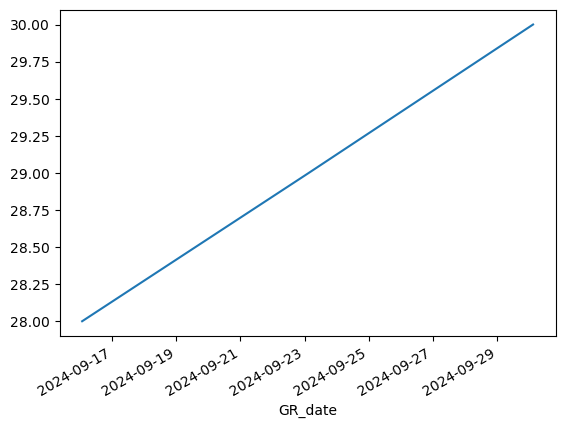

In [33]:
vyvoj[vyvoj['GR_title'].str.contains('Duše národa',na=False)]['GR_ratings_count'].plot()

<Axes: xlabel='GR_date'>

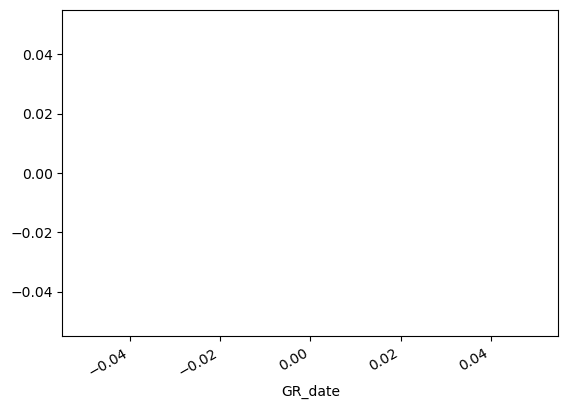

In [34]:
vyvoj[vyvoj['GR_title'].str.contains('Reportér',na=False)]['GR_rating'].plot()

<Axes: xlabel='GR_date'>

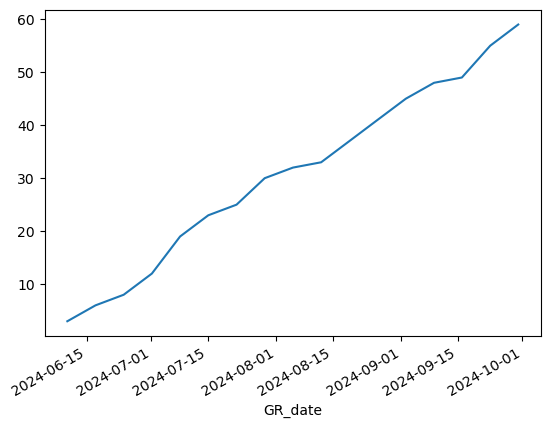

In [35]:
vyvoj[vyvoj['GR_title'].str.contains('Pacanka',na=False)]['GR_ratings_count'].plot()

### Další pokusy

In [37]:
gr['GR_date'] = pd.to_datetime(gr['GR_date'])

In [38]:
tydny = gr.groupby(pd.Grouper(key='GR_date', freq='W'))['GR_ratings_count'].sum()
tydny

GR_date
2024-04-07    36632.0
2024-04-14    24847.0
2024-04-21    12856.0
2024-04-28    12964.0
2024-05-05    13236.0
2024-05-12    13890.0
2024-05-19    14266.0
2024-05-26    14562.0
2024-06-02    14983.0
2024-06-09    15329.0
2024-06-16    15749.0
2024-06-23    16109.0
2024-06-30    16324.0
2024-07-07    16739.0
2024-07-14    17279.0
2024-07-21    18029.0
2024-07-28    18238.0
2024-08-04    18808.0
2024-08-11    19056.0
2024-08-18    19455.0
2024-08-25    20045.0
2024-09-01    20290.0
2024-09-08    20706.0
2024-09-15    20620.0
2024-09-22    20218.0
2024-09-29    23189.0
2024-10-06    28599.0
Freq: W-SUN, Name: GR_ratings_count, dtype: float64

In [39]:
monthly_sum = tydny.resample('M').sum()
monthly_sum

C:\Users\micha\AppData\Local\Temp\ipykernel_21248\2088204097.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = tydny.resample('M').sum()


GR_date
2024-04-30     87299.0
2024-05-31     55954.0
2024-06-30     78494.0
2024-07-31     70285.0
2024-08-31     77364.0
2024-09-30    105023.0
2024-10-31     28599.0
Freq: ME, Name: GR_ratings_count, dtype: float64

In [40]:
monthly_diff = monthly_sum.diff()
monthly_diff

GR_date
2024-04-30        NaN
2024-05-31   -31345.0
2024-06-30    22540.0
2024-07-31    -8209.0
2024-08-31     7079.0
2024-09-30    27659.0
2024-10-31   -76424.0
Freq: ME, Name: GR_ratings_count, dtype: float64

In [41]:
gr

,GR_isbn,GR_date,GR_title,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars
0,9.788024e+12,2024-04-01 14:11:25,Sochař by Artur Janoušek,2.00,2.0,1.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN
1,9.788088e+12,2024-04-01 14:11:30,I smutek byl jen sen. Poezie Josefa Kocourka b...,4.00,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN
2,9.788073e+12,2024-04-01 14:11:34,Hranice zvrhlosti by Jan Urban,3.29,14.0,3.0,"May 15, 2023",NaN,NaN,NaN,NaN,NaN
3,9.788091e+12,2024-04-01 14:11:37,Z pera knihomolů: 11 povídek od českých a slov...,3.86,140.0,29.0,"March 31, 2023",NaN,NaN,NaN,NaN,NaN
4,9.788076e+12,2024-04-01 14:11:43,"Stará béčková legenda (Stará béčková legenda, ...",4.21,19.0,6.0,"April 3, 2023",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19103,9.788091e+12,2024-09-30 03:45:16,"Neohlížej se, zkameníš by Alena Wagnerová",4.10,10.0,0.0,"January 1, 2023",0.0,0.0,0.0,9.0,1.0
19104,9.788028e+12,2024-09-30 03:45:46,Geostorky by Petr Brož,4.38,45.0,7.0,"September 13, 2023",0.0,0.0,6.0,16.0,23.0
19105,9.788081e+12,2024-09-30 03:45:50,Škola nie je výchovný tábor by Mária Belešová,3.00,6.0,0.0,"February 15, 2023",1.0,1.0,2.0,1.0,1.0
19106,9.788028e+12,2024-09-30 03:45:52,What tumors teach us: Parallels in cell and hu...,0.00,0.0,0.0,"December 8, 2023",0.0,0.0,0.0,0.0,0.0


In [42]:
prvni = gr.groupby('GR_title')['GR_date'].min()
prvni = prvni[prvni < '2024-04-22']
prvni = prvni.index.to_list()

In [43]:
pocitaci_zaklad = gr[~gr['GR_title'].isin(prvni)][['GR_date','GR_title','GR_rating','GR_ratings_count']].sort_values(by='GR_date')
pocitaci_zaklad

,GR_date,GR_title,GR_rating,GR_ratings_count
3372,2024-04-22 02:22:38,Domeček pro panenky by Ivan Wernisch,0.00,0.0
3663,2024-04-29 02:00:07,Boží potměšilost by Zdeněk Řehák,2.00,1.0
3785,2024-04-29 02:08:35,"Velice dlouhé schody (Ota Fink, #9) by Jarosla...",4.33,9.0
3893,2024-04-29 02:21:26,Starý paní mají v ústech porcelán by Monika Ti...,3.00,1.0
3909,2024-04-29 02:22:16,Domeček pro panenky by Ivan Wernisch,5.00,1.0
...,...,...,...,...
19089,2024-09-30 03:44:09,"Když chcípat, tak správně by Karel Šebek",5.00,1.0
19090,2024-09-30 03:44:19,Šedesát let v psychiatrii jako majitel klíčů b...,3.00,2.0
19098,2024-09-30 03:44:57,Rjesurrjekturys: M.A. Bjeljanskyj. Resurrectur...,0.00,0.0
19100,2024-09-30 03:45:06,Bláznivé rodičovství: humorná siesta pro unave...,4.33,3.0


In [44]:
pocitaci_zaklad['tydnu'] = pocitaci_zaklad.groupby('GR_title').cumcount() + 1

In [45]:
pocitaci_zaklad.sort_values(by="tydnu")

,GR_date,GR_title,GR_rating,GR_ratings_count,tydnu
3372,2024-04-22 02:22:38,Domeček pro panenky by Ivan Wernisch,0.00,0.0,1
17526,2024-09-23 01:33:34,Jako lovná zvěř by Michaela Ryšavá,4.00,1.0,1
17528,2024-09-23 01:33:41,Výměna by Alisek,3.00,1.0,1
17531,2024-09-23 01:33:53,Prokletí rodu Janoviců by Vlastimil Vondruška,3.50,2.0,1
17551,2024-09-23 01:35:32,Zlomky nekonečna by Adéla Rosípalová,4.33,239.0,1
...,...,...,...,...,...
18739,2024-09-30 02:30:46,"Velice dlouhé schody (Ota Fink, #9) by Jarosla...",4.33,15.0,23
17805,2024-09-23 02:20:44,Domeček pro panenky by Ivan Wernisch,5.00,1.0,23
18224,2024-09-30 01:20:23,Psychologie pro každý den aneb Co nás ve škole...,0.00,0.0,23
18198,2024-09-30 01:18:06,Čemu a proč se smějeme? by Slavoj Titul,3.67,3.0,23


<Axes: xlabel='tydnu'>

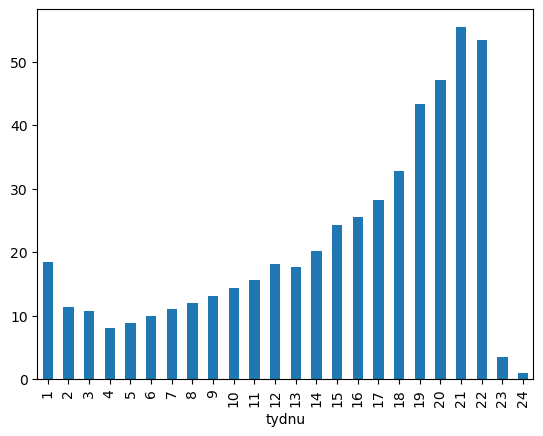

In [46]:
pocitaci_zaklad.groupby('tydnu')['GR_ratings_count'].mean().plot.bar()

<Axes: xlabel='tydnu'>

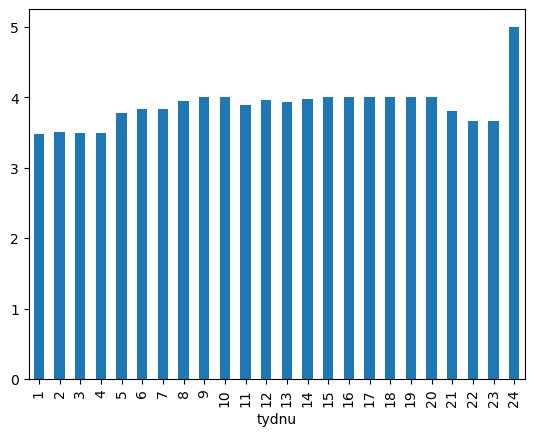

In [47]:
pocitaci_zaklad.groupby('tydnu')['GR_rating'].median().plot.bar()

In [48]:
import matplotlib.pyplot as plt


<Axes: title={'center': 'GR_ratings_count'}, xlabel='tydnu'>

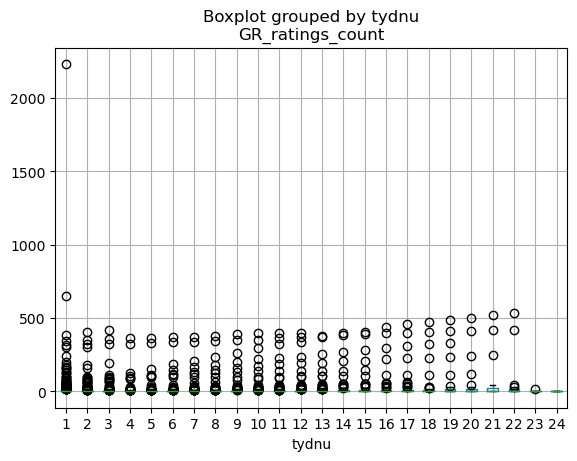

In [49]:
pocitaci_zaklad.boxplot(column='GR_ratings_count', by='tydnu')

## Databáze knih

In [51]:
x = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [52]:
x

,M_titul,M_autorstvo,M_anotace,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,...,M_ilustrace,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
0,Estetický prožitek\n Novinka,Vlastimil Zuska,Estetický prožitek/zkušenost je jedním z klíčo...,"[estetika, zážitek, prožitek]",236.0,brožovaná vazba,130×190 mm,300 g,9788024658872,2024,...,None,None,NaN,None,None,None,None,None,None,None
1,Sen o lidské tváři,Ivan R. Vičar,Romeo a Julie jsou hrdiny středověkého příběhu...,"[sen, historie]",260.0,brožovaná vazba,130×200 mm,None,9788087373804,2024,...,None,None,NaN,None,None,None,None,None,None,None
2,Stopy osudu v čase,Mirka Langerová,Jmenuji se Mirka Langerová a narodila jsem se ...,"[radost, zbírka, romantika, smutek]",296.0,pevná vazba,120×184 mm,304 g,9788088363200,2021,...,None,None,NaN,None,None,None,None,None,None,None
3,Definice poezie,Michael Třeštík,"Definice poezie nejsou nic nového, už to napad...","[poezie, básně]",NaN,None,None,None,9788087545959,2024,...,None,None,NaN,None,None,None,None,None,None,None
4,Nasraná máma 1,Tereza Maroušková,Jak přežít těhotenství? Fakt nevim! Dula vám j...,"[porod, humor, těhotenství]",192.0,brožovaná vazba,143×201 mm,352 g,9788090815001,2021,...,None,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,"[socialismus, dobová atmosféra, 20. století, p...",264.0,pevná vazba,146×185 mm,436 g,9788024936802,2018,...,None,None,NaN,None,None,None,None,None,None,None
12208,Europeana,Patrik Ouředník,Co je pravda? Historická pravda? Literární pra...,None,100.0,pevná vazba,130×210 mm,224 g,9788072078325,2012,...,None,None,NaN,None,None,None,None,None,None,None
12209,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,"[historické události, 1945, autobiografický, d...",432.0,pevná vazba,139×204 mm,557 g,9788073354008,2015,...,None,None,NaN,None,None,None,None,None,None,None
12210,Teorie spolehlivosti,Ivan Diviš,Druhé rozšířené vydání. Rozsáhlá kniha krátkýc...,None,712.0,pevná vazba,140×200 mm,26 g,8072151614,2002,...,None,None,NaN,None,None,None,None,None,None,None


In [53]:
dk = pd.read_csv(os.path.join("data","databazeknih-hodnoceni.csv"))

In [54]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených'],
      dtype='object')

In [55]:
    month_ago = pd.to_datetime(gr['GR_date'].max()) - datetime.timedelta(days=29)


In [56]:
dk['skore'] = dk['DK_Chystám_se_číst'] + dk['DK_Přečtených']
dk['skore']

0         48.0
1        610.0
2         52.0
3        229.0
4         51.0
         ...  
40398    206.0
40399      5.0
40400     11.0
40401     23.0
40402    569.0
Name: skore, Length: 40403, dtype: float64

In [57]:
dk.sample(10)

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,skore
28652,9.788027e+12,2024-08-12 03:52:40,Rande,67.0,43.0,"['Humor', 'Povídky', 'Literatura česká']",7.0,69.0,9.0,61.0,23.0,12.0,2.0,NaN,92.0
21647,9.788077e+12,2024-07-08 03:39:49,Nezastavuj,82.0,13.0,"['Romány', 'Literatura česká']",NaN,17.0,3.0,4.0,6.0,3.0,NaN,2.0,23.0
3447,9.788028e+12,2024-04-05 10:05:53,Smrt hraje vrhcáby,88.0,27.0,['historické detektivky'],1.0,38.0,7.0,49.0,14.0,4.0,1.0,2.0,52.0
11883,9.788025e+12,2024-05-20 03:11:01,Karel IV.: Evropský císař,87.0,3.0,"['Literatura naučná', 'Biografie a memoáry', '...",NaN,5.0,NaN,4.0,6.0,5.0,1.0,1.0,11.0
31385,9.788074e+12,2024-08-26 03:45:25,Pošahaný svět: Povídky vytržené z blogu,88.0,5.0,"['Povídky', 'Literatura česká']",NaN,5.0,NaN,NaN,2.0,4.0,NaN,NaN,7.0
17233,9.788025e+12,2024-06-17 03:32:03,Zapisovatelé otcovský lásky,70.0,314.0,"['Romány', 'Literatura česká']",2.0,648.0,8.0,169.0,28.0,5.0,1.0,23.0,676.0
37376,9.788091e+12,2024-09-23 03:38:05,"Neohlížej se, zkameníš",80.0,5.0,"['Literatura naučná', 'Historie']",NaN,6.0,NaN,13.0,9.0,6.0,NaN,2.0,15.0
20590,9.788088e+12,2024-07-08 03:25:29,Pardubický kraj: Objektivem mezi nebem a zemí,100.0,1.0,"['Literatura naučná', 'Cestopisy a místopisy',...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32825,9.788088e+12,2024-09-02 04:05:16,Kudlanka,81.0,44.0,"['Detektivky, krimi', 'Pro ženy', 'Literatura ...",2.0,57.0,3.0,76.0,35.0,7.0,1.0,3.0,92.0
11236,9.788028e+12,2024-05-13 03:20:37,Smrt hraje vrhcáby,89.0,31.0,"['Detektivky, krimi', 'Literatura česká', 'His...",NaN,43.0,7.0,51.0,15.0,3.0,1.0,2.0,58.0


In [58]:
gr['GR_title'].nunique()

1043

In [59]:
dk['DK_titul'].nunique()

2276

In [60]:
dk

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,skore
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,29.0,6.0,NaN,NaN,48.0
1,9.788021e+12,2024-04-01 14:39:24,Oprátka za osm mrtvých,88.0,301.0,"['ženy', 'psychiatrické léčebny', 'Českosloven...",3.0,400.0,56.0,150.0,210.0,60.0,9.0,22.0,610.0
2,9.788072e+12,2024-04-01 14:39:25,Golem,82.0,26.0,"['golem', 'Rabi Löw']",NaN,34.0,4.0,28.0,18.0,3.0,NaN,3.0,52.0
3,9.788076e+12,2024-04-01 14:39:26,Proč všichni odcházejí,91.0,50.0,['autobiografické prvky'],2.0,59.0,1.0,13.0,170.0,45.0,NaN,5.0,229.0
4,9.788024e+12,2024-04-01 14:39:27,Sochař,81.0,19.0,[],1.0,28.0,2.0,46.0,23.0,7.0,1.0,1.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40398,9.788028e+12,2024-09-30 04:05:04,Geostorky,92.0,92.0,"['Literatura česká', 'Literatura naučná', 'Věda']",5.0,112.0,21.0,66.0,94.0,20.0,NaN,11.0,206.0
40399,9.788025e+12,2024-09-30 04:05:05,Nově objevené vtipy,90.0,2.0,"['Humor', 'Literatura česká']",NaN,4.0,1.0,3.0,1.0,NaN,NaN,NaN,5.0
40400,9.788076e+12,2024-09-30 04:05:06,Andělem nikdo z nás není: Blízcí Boženy Němcov...,70.0,4.0,"['Literatura faktu', 'Historie']",NaN,5.0,1.0,3.0,6.0,3.0,NaN,NaN,11.0
40401,9.788077e+12,2024-09-30 04:05:06,Christopher,96.0,10.0,"['Detektivky, krimi', 'Literatura česká', 'Fan...",1.0,10.0,NaN,37.0,13.0,4.0,1.0,3.0,23.0


In [61]:
len(dk)

40403

In [62]:
len(dk.drop_duplicates())

40403

In [63]:
dk['DK_date'].max()

'2024-09-30 04:05:07'

In [64]:
dk['DK_date'] = pd.to_datetime(dk['DK_date'])

In [65]:
novinky

['Okřídlení tvorové v bouřkových mračnech by Karin Novotná',
 'Třída špionů: Záhada strašidelného hradu by Petra Martišková',
 'S láskou tě nenávidím by Lucy  Harris',
 'O medvídkovi, co neuměl plavat, ale naučil se číst by Barbora Melíková',
 'Špilberk v pověstech by Michaela Bystrá Radvanová',
 'Canto ostinato: Listopad, prožitky blízké zimy by Pavel Kolmačka',
 'Dveře ke snu by Daniela Krolupperová',
 'Strašidelná Šumava by Arnošt Goldflam',
 'Theomachia (Válka bohů, #1) by Petr Jaroněk',
 'Pětatřicítka by Petra Karina Kamas',
 'Zasněžené hory by Marie Jakoubková',
 'Padlý vládce nebes by Denisa Janštová',
 'Knížka o kočkách by Václav Bárta',
 'Vztahy vážně i nevážně by Tomáš  Braun',
 'Noční slunce by Jiří Březina',
 'Stmívá se... by Roman Szpuk',
 'Morčecí pohádky by Milada Kubátová',
 'Soumrak Edenu by Lucie Ortega',
 'Kuna z Brna by Markéta Pilátová',
 'Lepšího manžela abys pohledala by Alena Jakoubková',
 'Bez dechu (Projekt Alfa, #3) by Lenka Dostálová',
 'Saturnin při chuti b

In [66]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'skore'],
      dtype='object')

In [67]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'skore'],
      dtype='object')

In [68]:
dk_nove = dk[dk['DK_date'] < '2024-04-22']['DK_titul'].drop_duplicates().to_list()
dk_nove = dk[~dk['DK_titul'].isin(dk_nove)]

In [69]:
pocitame_dk = dk_nove[['DK_titul','DK_date','DK_rating','DK_ratings_count','DK_Chystám_se_číst']]

In [70]:
pocitame_dk['tydnu'] = pocitame_dk.groupby('DK_titul').cumcount() + 1

C:\Users\micha\AppData\Local\Temp\ipykernel_21248\4289471237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pocitame_dk['tydnu'] = pocitame_dk.groupby('DK_titul').cumcount() + 1


<Axes: xlabel='tydnu'>

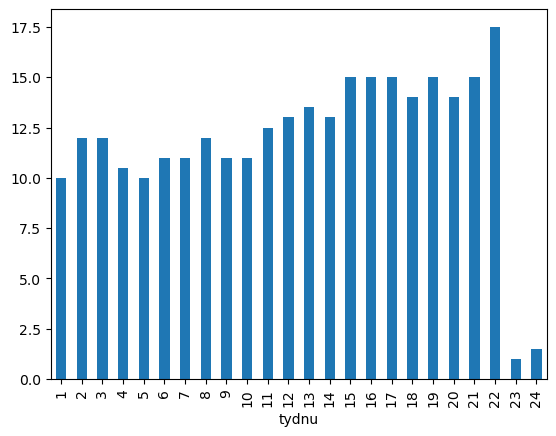

In [71]:
pocitame_dk.groupby('tydnu')['DK_Chystám_se_číst'].median().plot.bar()

<Axes: xlabel='tydnu'>

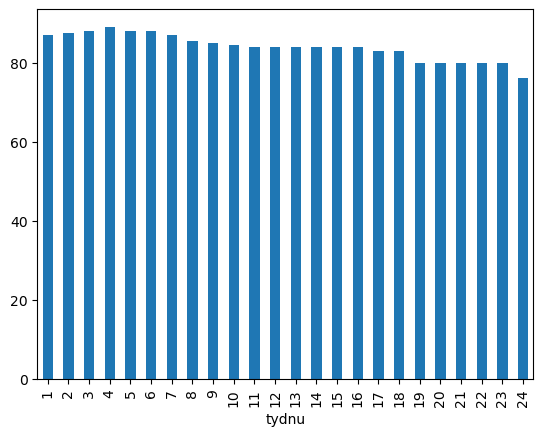

In [72]:
pocitame_dk.groupby('tydnu')['DK_rating'].median().plot.bar()

In [73]:
gr['autorstvo'] = gr['GR_title'].apply(lambda x: x.split(' by ')[1].strip())

In [74]:
gr['autorstvo']

0          Artur Janoušek
1          Josef Kocourek
2              Jan  Urban
3          Eliška Hronová
4          Shigor Birdman
               ...       
19103     Alena Wagnerová
19104           Petr Brož
19105      Mária Belešová
19106       Jana Šmardová
19107    Mirka Skočílková
Name: autorstvo, Length: 19108, dtype: object

In [75]:
import numpy as np

In [76]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [77]:
df['isbn'] = df['M_isbn'].astype(str).apply(lambda x: x.replace(".0",""))
dk['isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [78]:
df

,M_titul,M_autorstvo,M_anotace,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,...,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha,isbn
0,Estetický prožitek\n Novinka,Vlastimil Zuska,Estetický prožitek/zkušenost je jedním z klíčo...,"[estetika, zážitek, prožitek]",236.0,brožovaná vazba,130×190 mm,300 g,9788024658872,2024,...,None,NaN,None,None,None,None,None,None,None,9788024658872
1,Sen o lidské tváři,Ivan R. Vičar,Romeo a Julie jsou hrdiny středověkého příběhu...,"[sen, historie]",260.0,brožovaná vazba,130×200 mm,None,9788087373804,2024,...,None,NaN,None,None,None,None,None,None,None,9788087373804
2,Stopy osudu v čase,Mirka Langerová,Jmenuji se Mirka Langerová a narodila jsem se ...,"[radost, zbírka, romantika, smutek]",296.0,pevná vazba,120×184 mm,304 g,9788088363200,2021,...,None,NaN,None,None,None,None,None,None,None,9788088363200
3,Definice poezie,Michael Třeštík,"Definice poezie nejsou nic nového, už to napad...","[poezie, básně]",NaN,None,None,None,9788087545959,2024,...,None,NaN,None,None,None,None,None,None,None,9788087545959
4,Nasraná máma 1,Tereza Maroušková,Jak přežít těhotenství? Fakt nevim! Dula vám j...,"[porod, humor, těhotenství]",192.0,brožovaná vazba,143×201 mm,352 g,9788090815001,2021,...,None,NaN,None,None,None,None,None,None,None,9788090815001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,"[socialismus, dobová atmosféra, 20. století, p...",264.0,pevná vazba,146×185 mm,436 g,9788024936802,2018,...,None,NaN,None,None,None,None,None,None,None,9788024936802
12208,Europeana,Patrik Ouředník,Co je pravda? Historická pravda? Literární pra...,None,100.0,pevná vazba,130×210 mm,224 g,9788072078325,2012,...,None,NaN,None,None,None,None,None,None,None,9788072078325
12209,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,"[historické události, 1945, autobiografický, d...",432.0,pevná vazba,139×204 mm,557 g,9788073354008,2015,...,None,NaN,None,None,None,None,None,None,None,9788073354008
12210,Teorie spolehlivosti,Ivan Diviš,Druhé rozšířené vydání. Rozsáhlá kniha krátkýc...,None,712.0,pevná vazba,140×200 mm,26 g,8072151614,2002,...,None,NaN,None,None,None,None,None,None,None,8072151614


In [79]:
df['isbn']

0        9788024658872
1        9788087373804
2        9788088363200
3        9788087545959
4        9788090815001
             ...      
12207    9788024936802
12208    9788072078325
12209    9788073354008
12210       8072151614
12211    9788087270516
Name: isbn, Length: 12212, dtype: object

In [80]:
dk['skore'] = dk['DK_Chystám_se_číst'] + dk['DK_Přečtených']

In [81]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'skore', 'isbn'],
      dtype='object')

In [82]:
df.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_tagy', 'M_počet_stran',
       'M_vazba', 'M_rozměr', 'M_hmotnost', 'M_isbn', 'M_rok_vydání',
       'M_jazyk', 'M_původ', 'M_nakladatel', 'M_kategorizace', 'M_cena',
       'M_obálka', 'M_ebook', 'M_audiokniha', 'M_datum', 'M_soubor',
       'M_podtitul', 'M_série', 'M_díl', 'M_edice', 'M_pro_koho', 'M_styl',
       'M_originální_název', 'M_věkové_doporučení', 'M_ilustrace',
       'M_účel_knihy', 'M_předběžné_datum_vydání', 'M_vydání', 'M_překlad',
       'M_ostatní', 'M_příloha', 'M_jazyková_úroveň', 'M_editoři',
       'M_knižní_předloha', 'isbn'],
      dtype='object')

### Nejvíce nových hodnocení od dubna '24

In [84]:
def hezky_titul(row):
    try:
        autorstvo = df[df['isbn'] == row['isbn']]['M_autorstvo'].drop_duplicates().to_list()[0]
        return f"""{autorstvo}: {row['DK_titul']}"""
    except:
        return f"""?: {row['DK_titul']}"""

In [85]:
dk['hezky_titul'] = dk.apply(lambda row: hezky_titul(row), axis=1)

In [86]:
pd.Series(dk.groupby("hezky_titul")['DK_ratings_count'].max() - dk.groupby("hezky_titul")['DK_ratings_count'].min()).nlargest(20)

hezky_titul
Karin Lednická: Šikmý kostel 3                  909.0
Patrik Hartl: Gazely                            566.0
Markéta Lukášková: Odvaha                       519.0
Kristýna Trpková: Někdo z nás                   497.0
Nina Špitálníková: Severka                      448.0
?: U severní zdi                                386.0
Petra Dvořáková: Pláňata                        293.0
Marek Torčík: Rozložíš paměť                    254.0
Pavlína Křivánková: Chalupa                     245.0
Jakub Stanjura: Srpny                           227.0
Hana Marie Kornerová: Heřmánkové údolí          221.0
Michaela Klevisová: Vraní oko                   216.0
Štěpán Javůrek: Sudetský dům II: Podzim 1947    213.0
Leoš Kyša: Sudetenland                          207.0
Radka Třeštíková: Kde jsi, když nejsi           203.0
Tereza Bartošová: Klekánice                     193.0
Tereza Bartošová Dvořáková: Vodník              178.0
Kateřina Surmanová: Tři Sekery                  173.0
Kristýna Trpková

In [88]:
#!/usr/bin/env python

import os
import requests
import datetime
import pandas as pd

kam_stahovat = "downloads/aleph"

if not os.path.exists(kam_stahovat):
    os.makedirs(kam_stahovat)

stazene = [s.split('.')[0] for s in os.listdir(kam_stahovat)]

isbns = [i for i in pd.read_json(os.path.join('data','martinus_vyslo.json'))['M_isbn'].to_list() if len(i) == 13]

print(f'{len(isbns)} ISBN ke stažení')

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
}

for i in isbns[1000:1005]:
    if i not in stazene:

        try:
            print(f"Stahuji ISBN {i}")
            r = requests.get(f"https://aleph.nkp.cz/F/?func=find-b&find_code=ISN&x=0&y=0&request={i}&filter_code_1=WTP&filter_request_1=&filter_code_2=WLN&adjacent=N", headers=headers, timeout=15)
            r.encoding = r.apparent_encoding
            if "Úplné zobrazení záznamu" in r.text:
                with open(os.path.join(kam_stahovat,f'{i}.html'), "w+", encoding='utf-8') as f:
                    f.write(f"""{r.text}\n\n<!-- {datetime.datetime.now().replace(microsecond=0)} -->""")
        except Exception as E:
            print(E)
            pass
    else:
        print(f"ISBN {i} už staženo")

for filename in os.listdir(kam_stahovat):
    file_path = os.path.join(kam_stahovat, filename)
    if os.path.isfile(file_path) and os.path.getsize(file_path) == 0:
        print(f'Mažu {filename}')
        os.remove(file_path)

11809 ISBN ke stažení
ISBN 9788075302755 už staženo
ISBN 9788090563377 už staženo
ISBN 9788090746916 už staženo
ISBN 9788024392127 už staženo
ISBN 9788076701809 už staženo


In [89]:
dk_stare = dk[dk['DK_date'] < month_ago]['hezky_titul'].drop_duplicates().to_list()
dk_nove = dk[~dk['hezky_titul'].isin(dk_stare)]['hezky_titul'].drop_duplicates().to_list()
dk_nove

['Hana Kneblová: Šlechta v českých zemích: Díl druhý',
 "['Kateřina Svrčinová', 'Renata Raduševa Herber']: Kouzelná lékárna: Vitaminy a minerály",
 'Marie Foltýnová: Život sochy v Praze',
 'Jan Kaliba: Zápas o Ameriku: Hlasy z rozeštvané země',
 'Eva Rybková: Puberta: Jak si ji s dětmi užít',
 "['Václav Smrčka', 'Zdenka Musilová']: Tisíc let nemocí a válek z kostnic Čech a Moravy",
 'Jiří Kovařík: Ať žije národ!: Francouzská revoluce 2 (1795',
 'Václav Petráš: Jak vychovat z dítěte sportovce',
 'Ester Davidová: Kiliánovo tajemství',
 'Ladislav Beran: Dobře upletená oprátka',
 'Václav Kořínek: Aknael: Nebeská jízda',
 'Alena Jakoubková: Běda mužům, kterým žena mládne',
 'Tereza Ješátková: Veřejná sbírka',
 'Jan Tomášek: Kouzlo desistence: Jak se napravují pachatelé v Čechách',
 "['Petr Strossa', 'Jiří Fiala']: Automobily: Jména, značky a znaky",
 'Stanislav Rádl: Příběhy spojené s objevy nových léčiv',
 'Roman Kořan: Výklad reliéfů pekařství Poilâne',
 'Klára Houšková: Zmizelá místa: Za

In [90]:
dk_mesic_celkem = pd.Series(dk.groupby("hezky_titul")['skore'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['skore'].min()).sort_values(ascending=False)
dk_mesic_celkem.nlargest(30)

hezky_titul
Karin Lednická: Šikmý kostel 3                  179.0
Markéta Lukášková: Odvaha                       148.0
Petra Klabouchová: Ignis fatuus                 131.0
Patrik Hartl: Gazely                            121.0
?: Les                                          102.0
?: U severní zdi                                 96.0
Nina Špitálníková: Severka                       88.0
Kristýna Trpková: Někdo z nás                    83.0
Kateřina Surmanová: Tři Sekery                   70.0
Petra Dvořáková: Pláňata                         70.0
Tereza Bartošová: Klekánice                      64.0
Michaela Duffková: Zápisník alkoholičky          49.0
Michaela Klevisová: Vraní oko                    49.0
Jana Jašová: Krutý měsíc                         47.0
Hana Marie Kornerová: Heřmánkové údolí           47.0
Tereza Bartošová Dvořáková: Vodník               47.0
Marek Torčík: Rozložíš paměť                     45.0
Radka Třeštíková: Kde jsi, když nejsi            43.0
Daniel Krásný: D

In [91]:
def nakladatelstvi(isbn):
    try:
        return df[df['isbn'] == isbn]['M_nakladatel'].drop_duplicates().to_list()[0]
    except:
        return None

In [92]:
dk['nakladatel'] = dk['isbn'].apply(lambda x: nakladatelstvi(x))

In [93]:
dk['nakladatel'].sample(20)

36096              Větrné mlýny
26205                     Brána
17090                 CooBoo CZ
6949                     Paseka
38416          Extra Publishing
3739                   Odeon CZ
26036                      Argo
23256    Czech.Ina Group s.r.o.
21810                Cosmopolis
8309          Kosmas s.r.o.(HK)
9784                    Ikar CZ
4274             Talent Pro ART
12250            Straky na vrbě
37924                      Host
24340                     GEKKO
14393                    CPRESS
40271             Mystery Press
13119                     Grada
24444                     Klika
1712        Miloš Uhlíř - Baset
Name: nakladatel, dtype: object

In [94]:
dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel','skore'])['DK_date'].first()

hezky_titul                                              nakladatel     skore
Adam Kašpar: Adam Kašpar                                 Books & Pipes  2.0     2024-09-02 04:02:16
Adam Táborský: Terapie mezi stromy                       Portál         24.0    2024-09-02 03:55:36
Adriana Krnáčová: Nemesis: Temné město                   Kalibr         17.0    2024-09-30 03:48:40
Adéla Chrástecká: Všechno, co jsem zapomněla             Pointa         40.0    2024-09-02 04:05:32
                                                                        41.0    2024-09-23 03:42:59
                                                                                        ...        
Šárka Hieková: Možná už zítra                            Moba           156.0   2024-09-16 02:57:49
                                                                        158.0   2024-09-30 03:58:03
Šárka Przewozná: Skutečná                                Vendeta        42.0    2024-09-16 02:52:08
Žaneta Neužilová: Do s

In [95]:
dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()

hezky_titul                                              nakladatel   
Adam Kašpar: Adam Kašpar                                 Books & Pipes      2.0
Adam Táborský: Terapie mezi stromy                       Portál            24.0
Adriana Krnáčová: Nemesis: Temné město                   Kalibr            17.0
Adéla Chrástecká: Všechno, co jsem zapomněla             Pointa            40.0
Adéla Knapová: Zbabělé zápisky z ukrajinské války        Fra               29.0
                                                                          ...  
Šárka Andrlová: Tajemství domu v L.                      Moba             148.0
Šárka Hieková: Léto na zámku                             Moba              44.0
Šárka Hieková: Možná už zítra                            Moba             153.0
Šárka Przewozná: Skutečná                                Vendeta           42.0
Žaneta Neužilová: Do skonání věků 2: A jak to bylo dál?  Pointa            11.0
Name: skore, Length: 1666, dtype: float64

In [96]:
pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min())

,,skore
hezky_titul,nakladatel,
Adam Kašpar: Adam Kašpar,Books & Pipes,0.0
Adam Táborský: Terapie mezi stromy,Portál,0.0
Adriana Krnáčová: Nemesis: Temné město,Kalibr,0.0
"Adéla Chrástecká: Všechno, co jsem zapomněla",Pointa,1.0
Adéla Knapová: Zbabělé zápisky z ukrajinské války,Fra,1.0
...,...,...
Šárka Andrlová: Tajemství domu v L.,Moba,10.0
Šárka Hieková: Léto na zámku,Moba,13.0
Šárka Hieková: Možná už zítra,Moba,5.0


In [97]:
pribytek = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index().sum().iloc[1]

In [98]:
nakladatelstvo = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index()
nakladatelstvo['podil'] = nakladatelstvo['skore'] / pribytek
nakladatelstvo = nakladatelstvo[nakladatelstvo['podil'] >= 0.01]
nakladatelstvo['podil'] = nakladatelstvo['podil'].apply(lambda x: f"""{round(x * 100, 1)} %""".replace(".", ","))
nakladatelstvo = nakladatelstvo.sort_values(by='skore',ascending=False)
nakladatelstvo = nakladatelstvo.drop(columns=['skore'])
nakladatelstvo

,nakladatel,podil
195,Motto,"11,3 %"
192,Moba,"9,7 %"
124,Host,"8,8 %"
140,Kalibr,"6,0 %"
127,Ikar CZ,"4,4 %"
41,Bourdon,"3,9 %"
46,Bílá vrána,"3,8 %"
20,Argo,"3,5 %"
88,Epocha,"3,0 %"
240,Paseka,"2,4 %"


In [99]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'skore', 'isbn',
       'hezky_titul', 'nakladatel'],
      dtype='object')

In [100]:
def koho_vydavaji(n):
    top = dk[dk['nakladatel'] == n].groupby('hezky_titul')['DK_ratings_count'].max().nlargest(10).index.to_list()
    top2 = [x.split(":")[0] for x in top if "[" not in x]
    top2 = list(set(top2))
    kolik = len(top2)
    if kolik >= 3:
        return top2[:3]
    else:
        return top2

In [101]:
for index, row in nakladatelstvo.iterrows():
    stars = koho_vydavaji(row['nakladatel'])
    stars_kratce = [x.split(' ')[-1] for x in stars]
    print(stars_kratce)

['Klevisová', 'Třeštíková', 'Lukášková']
['Horáková', 'Niedl', 'Vondruška']
['Denemarková', 'Stanjura', 'Dvořáková']
['Bauer', 'Goffa', 'Surmanová']
['Viewegh', 'Dolejšová', 'Macháčková']
['Kalenda', 'Hartl', 'Chalupníková']
['Lednická']
['Hůlová', 'Konáš', 'Teršová']
['Bureš', 'Sněgoňová', 'Kotleta']
['Kašpárek', 'Dostálová', 'Torčík']
['Vlasáková', 'Ambrožová', 'Huškova']
['Paytok', 'Birdman', 'Mařík']
['Langová', 'Parsley', 'Hamáková']
['Špitálníková']
['Lukešová', 'Boučková', 'Žáková']
['Novák', 'Pavelková', 'Cílek']
['Štifter', 'Honzák', 'Březina']
['Hlubek', 'Black', 'Fido']
['Skopová', 'Brožová', 'Beňaková']
['Hlubek', 'Sacká', 'Hlavničková']
['Novotný', 'Boučková', 'Dubská']
['Novotný', 'Vaňura', 'Macek']
['Hubková', 'Hrabal', 'Kubů']


In [102]:
dk[dk['DK_date'] > month_ago].groupby(['nakladatel','hezky_titul'])['skore'].max().nlargest(20)

nakladatel    hezky_titul                                                  
Bourdon       Patrik Hartl: Okamžiky štěstí                                    8862.0
Moba          Hana Marie Kornerová: Heřmánkové údolí                           7240.0
Triáda        Anne Franková: Zadní dům: Deník                                  7159.0
Mladá fronta  Bohumil Hrabal: Obsluhoval jsem anglického krále                 3571.0
Kniha Zlín    Hynek Čapka: Neviditelné kořeny                                  2950.0
Bourdon       Patrik Hartl: Gazely                                             2939.0
1400          Jaroslav Hašek: Osudy dobrého vojáka Švejka za světové války     2473.0
Odeon CZ      ['Jaroslav Hašek', 'Josef Lada']: Osudy dobrého vojáka Švejka    2473.0
Motto         Michaela Klevisová: Vraní oko                                    2196.0
Bílá vrána    Karin Lednická: Šikmý kostel 3                                   2064.0
NLN s.r.o.    Nina Špitálníková: Severka                        

In [103]:
dk[dk['hezky_titul'].str.contains('Prchal')]

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,skore,isbn,hezky_titul,nakladatel


In [104]:
koho_vydavaji('Listen')

['Klára Vlasáková', 'Dorota Ambrožová', 'Lucie Huškova']

In [105]:
for index, row in nakladatelstvo.iterrows():
    stars = koho_vydavaji(row['nakladatel'])
    print(', '.join(stars))

Michaela Klevisová, Radka Třeštíková, Markéta Lukášková
Naďa Horáková, František Niedl, Vlastimil Vondruška
Radka Denemarková, Jakub Stanjura, Petra Dvořáková
Jan Bauer, Martin Goffa, Kateřina Surmanová
Michal Viewegh, Eva Dolejšová, Lucie Macháčková
František Kalenda, Patrik Hartl, Kateřina Chalupníková
Karin Lednická
Petra Hůlová, Jaroslav Konáš, Klára Teršová
Roman Bureš, Kristýna Sněgoňová, František Kotleta
Michal Kašpárek, Zuzana Dostálová, Marek Torčík
Klára Vlasáková, Dorota Ambrožová, Lucie Huškova
Martin Paytok, Shigor Birdman, Jakub Mařík
Petra Langová, Sarah Parsley, Marie Hamáková
Nina Špitálníková
Petra Lukešová, Martina Boučková, Ivana Žáková
Jan Novák, Kristína Pavelková, Roman Cílek
Jan Štifter, Radkin Honzák, Jiří Březina
Jan Hlubek, Theresa Black, Petra Fido
Kamila Skopová, Kateřina Brožová, Dagmar Beňaková
Jan Hlubek, Vlaďka Sacká, Lenka Hlavničková
Aleš Novotný, Martina Boučková, Kateřina Dubská
Aleš Novotný, Miroslav Vaňura, Miroslav Macek
Karolina Hubková, Bohumi

In [106]:
nakladatelstvo

,nakladatel,podil
195,Motto,"11,3 %"
192,Moba,"9,7 %"
124,Host,"8,8 %"
140,Kalibr,"6,0 %"
127,Ikar CZ,"4,4 %"
41,Bourdon,"3,9 %"
46,Bílá vrána,"3,8 %"
20,Argo,"3,5 %"
88,Epocha,"3,0 %"
240,Paseka,"2,4 %"


In [107]:
dk_mesic_nakladatele = pd.Series(dk[dk['DK_date'] > week_ago].groupby("nakladatel")['skore'].sum() - dk[dk['DK_date'] > month_ago].groupby("nakladatel")['skore'].sum()).sort_values(ascending=False)
dk_mesic_nakladatele.nlargest(30)

nakladatel
First Class Publishing            0.0
Martin Koláček - E-knihy jedou    0.0
Poznání                           0.0
GMP Group / Colibris              0.0
GLYF Media                        0.0
Projekt Hakuna Matata             0.0
PsychArt                          0.0
Extra Publishing                  0.0
Sláfka                            0.0
Drnka, o.s.                       0.0
Dona                              0.0
Muzeum Karlova mostu              0.0
Svetozár Krno                     0.0
Meander                           0.0
Computer Media                    0.0
Tatra Heritage, z.s.              0.0
Muza books                        0.0
Casablanca                        0.0
Carpe diem                        0.0
Theatrum mundi                    0.0
Thovt                             0.0
Pokáč                             0.0
Havran                            0.0
C. H. Beck                        0.0
Perplex                           0.0
Wolters Kluwer ČR                 0.0
L

In [108]:
dk_mesic_novinky = pd.Series(dk[~dk['hezky_titul'].isin(dk_stare)].groupby("hezky_titul")['skore'].max() - dk[(~dk['hezky_titul'].isin(dk_stare)) & (dk['DK_date'] > month_ago)].groupby("hezky_titul")['skore'].min()).sort_values(ascending=False)
dk_mesic_novinky = dk_mesic_novinky[dk_mesic_novinky >= 10]
dk_mesic_novinky

hezky_titul
Petra Klabouchová: Ignis fatuus                               131.0
?: Les                                                        102.0
Marie Hamáková: Dvě tváře lásky                                32.0
Vilém Koubek: Zatloukání hřebů                                 28.0
František Kotleta: Černá luna                                  20.0
Alena Jakoubková: Běda mužům, kterým žena mládne               18.0
Petra Štarková: Dej mi pokoj                                   18.0
Monika Fišerová: Chmýří pampelišky                             17.0
['František Kotleta', 'Kristýna Sněgoňová']: Plameny války     16.0
Tereza Bartošová: Dceřina kletba                               16.0
?: Přechodné období                                            14.0
Tereza Boučková: Dům v Matoušově ulici                         13.0
Karla Kubíková: Dům na konci ulice                             13.0
Alžběta Bublanová: Starosta                                    12.0
Ondřej Blaho: Severní den           

In [109]:
dk_mesic_ratings = pd.Series(dk.groupby("hezky_titul")['DK_ratings_count'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['DK_ratings_count'].min()).sort_values(ascending=False)
dk_mesic_ratings = dk_mesic_ratings[dk_mesic_ratings >= 25]
dk_mesic_ratings

hezky_titul
Karin Lednická: Šikmý kostel 3                  130.0
Markéta Lukášková: Odvaha                       101.0
?: Les                                           88.0
Petra Klabouchová: Ignis fatuus                  77.0
Patrik Hartl: Gazely                             72.0
?: U severní zdi                                 56.0
Nina Špitálníková: Severka                       55.0
Kristýna Trpková: Někdo z nás                    52.0
Kateřina Surmanová: Tři Sekery                   45.0
Hana Marie Kornerová: Heřmánkové údolí           35.0
Petra Dvořáková: Pláňata                         34.0
Kateřina Surmanová: Zvedá se vítr                32.0
Tereza Bartošová Dvořáková: Vodník               30.0
Michaela Klevisová: Vraní oko                    30.0
Marek Torčík: Rozložíš paměť                     30.0
Štěpán Javůrek: Sudetský dům II: Podzim 1947     29.0
Tereza Bartošová: Klekánice                      27.0
Patrik Hartl: Okamžiky štěstí                    26.0
Radka Třeštíková

In [110]:
dk_mesic_chystam = pd.Series(dk.groupby("hezky_titul")['DK_Chystám_se_číst'].max() - dk[dk['DK_date'] > month_ago].groupby("hezky_titul")['DK_Chystám_se_číst'].min()).sort_values(ascending=False)
dk_mesic_chystam = dk_mesic_chystam[dk_mesic_chystam >= 10]
dk_mesic_chystam

hezky_titul
Daniel Krásný: Druhý dech                                       36.0
Patrik Hartl: Gazely                                            35.0
Petra Klabouchová: Ignis fatuus                                 33.0
Tereza Bartošová: Klekánice                                     28.0
?: U severní zdi                                                28.0
Stanislav Stodůlka: Error                                       27.0
Markéta Lukášková: Odvaha                                       25.0
Jana Jašová: Krutý měsíc                                        25.0
?: Les                                                          23.0
Petra Dvořáková: Pláňata                                        21.0
Dorota Ambrožová: Poslední léto                                 20.0
Nina Špitálníková: Severka                                      20.0
Kateřina Chalupníková: MaminkOFF: Malovaly jsme si mateřství    19.0
Vilém Koubek: Zatloukání hřebů                                  17.0
Anna Strnadová: Život 

### Co se lidé nejvíce chystají číst v posledním týdnu

In [112]:
dk_tyden_chystam = pd.Series(dk.groupby("hezky_titul")['DK_Chystám_se_číst'].max() - dk[dk['DK_date'] > week_ago].groupby("hezky_titul")['DK_Chystám_se_číst'].min()).sort_values(ascending=False)
dk_tyden_chystam = dk_tyden_chystam[dk_tyden_chystam >= 5]
dk_tyden_chystam

hezky_titul
Patrik Hartl: Gazely                                  27.0
?: Les                                                23.0
Kateřina Karolová: Jiné místo                         16.0
Miriam Blahová: Příběh akvamarínu                     10.0
Halina Pawlowská: Rande                                9.0
Renáta Navrátilová: Můj sexy šéf                       9.0
Karin Lednická: Šikmý kostel 3                         9.0
Pavel Kolář: Řeka pod hladinou: Vědomím proti času     9.0
M.K. Hardy: Tanec za odpuštění                         8.0
Klára Vlasáková: Těla                                  8.0
Lucie Srňánková: Ano, pane Božský                      7.0
Aňa Geislerová: Co tě nezabije                         7.0
Nika Peas: Chráním Tě                                  7.0
Leoš Kyša: Sudetenland                                 7.0
Kateřina Pantovič: Josefíně všichni lžou               7.0
Jakub Hoza: Sochaři masa                               7.0
Hana Marie Kornerová: Heřmánkové údolí      

### Hot novinky

In [114]:
uz_byly = dk[dk['DK_date'] < week_ago]['hezky_titul'].drop_duplicates().to_list()
dk_novinky_chystam = dk[~dk['hezky_titul'].isin(uz_byly)].groupby('hezky_titul')['DK_Chystám_se_číst'].max().sort_values(ascending = False)
dk_novinky_chystam = dk_novinky_chystam[dk_novinky_chystam >= 5]
dk_novinky_chystam

hezky_titul
?: Les v domě                                               1150.0
?: Válka s Mloky                                             795.0
Hynek Čapka: Neviditelné kořeny                              792.0
Scarlett Wilková: Ty chladné oči                             496.0
?: Chalupa                                                   386.0
                                                             ...  
?: Cesta za štěstím vedla peklem                               5.0
?: Kupec a dobrodruh na Zlaté cestě                            5.0
?: Vynález zkázy (převyprávění)                                5.0
?: Z chlupaté deky: Pohádky nesmyslů zbavené                   5.0
['Martina D. Antonín', 'Jiří Pavlovský']: Pád do reality       5.0
Name: DK_Chystám_se_číst, Length: 193, dtype: float64

### Nejvíce hodnocené za poslední týden

In [116]:
pd.Series(dk.groupby("DK_titul")['DK_ratings_count'].max() - dk[dk['DK_date'] < week_ago].groupby("DK_titul")['DK_ratings_count'].max()).nlargest(60)

DK_titul
Gazely                                                                            49.0
U severní zdi                                                                     42.0
Ignis fatuus                                                                      41.0
Odvaha                                                                            32.0
Šikmý kostel 3                                                                    29.0
Pláč němého boha                                                                  19.0
Tři Sekery                                                                        15.0
Krutý měsíc                                                                       13.0
Rozložíš paměť                                                                    13.0
Čas krmení                                                                        12.0
Dceřina kletba                                                                    11.0
Heřmánkové údolí                  

### Nejlépe a nejhůře hodnocené knihy s víc než x hodnoceními

In [118]:
dk[dk['DK_ratings_count'] > 200].groupby("DK_titul")['DK_rating'].max().nlargest(20)

DK_titul
Neviditelné kořeny                                       96.0
U severní zdi                                            95.0
Šikmý kostel 3                                           95.0
Markovič: Lovec přízraků                                 93.0
Zatím dobrý: Mašínovi a největší příběh studené války    93.0
Deník Věrky Kohnové: Jak ráda bych tak zůstala           92.0
Heřmánkové údolí                                         92.0
Jednooký král Václav I.                                  92.0
Království meče                                          92.0
Tajemství Velkého Vonta (sběratelské vydání)             92.0
Čas vlků                                                 92.0
Blues: Blues pro bláznivou holku                         91.0
Na králův příkaz                                         91.0
Návrat nežádoucí                                         91.0
Operace Petragun                                         91.0
Pátá minuta je o nás                                     91.0

In [119]:
vyjde = pd.read_json('data/martinus_vyjde.json')

In [120]:
vyjde.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_tagy', 'M_počet_stran',
       'M_vazba', 'M_rozměr', 'M_hmotnost', 'M_isbn', 'M_rok_vydání',
       'M_jazyk', 'M_původ', 'M_nakladatel', 'M_kategorizace', 'M_cena',
       'M_obálka', 'M_ebook', 'M_audiokniha', 'M_datum', 'M_soubor',
       'M_podtitul', 'M_série', 'M_díl', 'M_edice', 'M_pro_koho', 'M_styl',
       'M_originální_název', 'M_věkové_doporučení', 'M_ilustrace',
       'M_účel_knihy', 'M_předběžné_datum_vydání', 'M_vydání', 'M_překlad',
       'M_ostatní', 'M_příloha', 'M_jazyková_úroveň', 'M_editoři',
       'M_knižní_předloha'],
      dtype='object')

In [121]:
dk[dk['DK_ratings_count'] > 50].groupby("DK_titul")['DK_rating'].max().nsmallest(50)

DK_titul
Bestiář                                  49.0
Pralinky                                 49.0
Sauronova nevěsta                        54.0
Srdce v plamenech                        58.0
Malý Gatsby a Carmen z Chodoriva         59.0
Sivá krev                                61.0
Neodpovídej                              63.0
Povídky o ženách                         64.0
Les                                      65.0
Smrková Tišina                           65.0
Nejvyšší karta                           66.0
Co se stalo Veronice                     67.0
Dokonalé městečko                        67.0
Povídky o lásce                          67.0
Město v mlze                             68.0
Souboj princů                            68.0
Ženy zločinu                             68.0
Pražačka na vsi                          69.0
Pusťte světlo do tmavého večera          69.0
Přechodné období                         69.0
Spoutej mě                               69.0
V hrůze a krvi zrozeni   

In [122]:
vyvoj2 = dk[['DK_date','DK_titul','DK_Chystám_se_číst']]
vyvoj2['DK_date'] = pd.to_datetime(vyvoj2['DK_date'])
vyvoj2 = vyvoj2.sort_values(by='DK_date')
vyvoj2 = vyvoj2.set_index('DK_date')

C:\Users\micha\AppData\Local\Temp\ipykernel_21248\3366174841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vyvoj2['DK_date'] = pd.to_datetime(vyvoj2['DK_date'])


<Axes: xlabel='DK_date'>

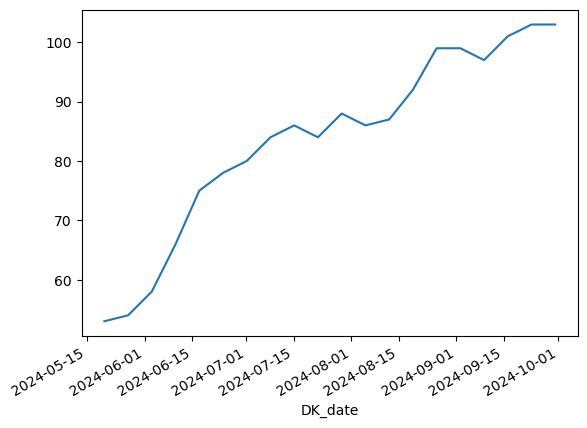

In [123]:
vyvoj2[vyvoj2['DK_titul'] == 'Pacanka']['DK_Chystám_se_číst'].plot()

<Axes: xlabel='DK_date'>

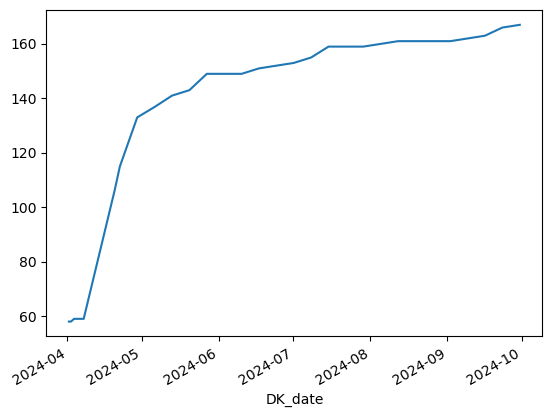

In [124]:
vyvoj2[vyvoj2['DK_titul'] == 'Hella']['DK_Chystám_se_číst'].plot()

## Syntéza (dál už to není zajímavé)

In [126]:
import numpy as np

In [127]:
df = pd.read_json(os.path.join("data","martinus_vyslo.json"))

In [128]:
df

,M_titul,M_autorstvo,M_anotace,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,...,M_ilustrace,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
0,Estetický prožitek\n Novinka,Vlastimil Zuska,Estetický prožitek/zkušenost je jedním z klíčo...,"[estetika, zážitek, prožitek]",236.0,brožovaná vazba,130×190 mm,300 g,9788024658872,2024,...,None,None,NaN,None,None,None,None,None,None,None
1,Sen o lidské tváři,Ivan R. Vičar,Romeo a Julie jsou hrdiny středověkého příběhu...,"[sen, historie]",260.0,brožovaná vazba,130×200 mm,None,9788087373804,2024,...,None,None,NaN,None,None,None,None,None,None,None
2,Stopy osudu v čase,Mirka Langerová,Jmenuji se Mirka Langerová a narodila jsem se ...,"[radost, zbírka, romantika, smutek]",296.0,pevná vazba,120×184 mm,304 g,9788088363200,2021,...,None,None,NaN,None,None,None,None,None,None,None
3,Definice poezie,Michael Třeštík,"Definice poezie nejsou nic nového, už to napad...","[poezie, básně]",NaN,None,None,None,9788087545959,2024,...,None,None,NaN,None,None,None,None,None,None,None
4,Nasraná máma 1,Tereza Maroušková,Jak přežít těhotenství? Fakt nevim! Dula vám j...,"[porod, humor, těhotenství]",192.0,brožovaná vazba,143×201 mm,352 g,9788090815001,2021,...,None,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,"[socialismus, dobová atmosféra, 20. století, p...",264.0,pevná vazba,146×185 mm,436 g,9788024936802,2018,...,None,None,NaN,None,None,None,None,None,None,None
12208,Europeana,Patrik Ouředník,Co je pravda? Historická pravda? Literární pra...,None,100.0,pevná vazba,130×210 mm,224 g,9788072078325,2012,...,None,None,NaN,None,None,None,None,None,None,None
12209,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,"[historické události, 1945, autobiografický, d...",432.0,pevná vazba,139×204 mm,557 g,9788073354008,2015,...,None,None,NaN,None,None,None,None,None,None,None
12210,Teorie spolehlivosti,Ivan Diviš,Druhé rozšířené vydání. Rozsáhlá kniha krátkýc...,None,712.0,pevná vazba,140×200 mm,26 g,8072151614,2002,...,None,None,NaN,None,None,None,None,None,None,None


In [129]:
df['isbn'] = df['M_isbn'].astype(str)

In [130]:
dk['isbn'] = dk['DK_isbn'].astype(str).apply(lambda x: x.replace(".0",""))

In [131]:
gr['isbn'] = gr['GR_isbn'].apply(lambda x: int(x)).astype(str)

In [132]:
dk['isbn']

0        9788027904853
1        9788020615770
2        9788072444748
3        9788076374591
4        9788024289472
             ...      
40398    9788027722587
40399    9788024755403
40400    9788076291133
40401    9788076912663
40402    9788024950143
Name: isbn, Length: 40403, dtype: object

In [133]:
dkm = dk.merge(df, on="isbn", how="inner")

In [134]:
dkm

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,...,M_ilustrace,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,None,None,NaN,None,None,None,None,None,None,None
1,9.788021e+12,2024-04-01 14:39:24,Oprátka za osm mrtvých,88.0,301.0,"['ženy', 'psychiatrické léčebny', 'Českosloven...",3.0,400.0,56.0,150.0,...,None,None,NaN,None,None,None,None,None,None,None
2,9.788072e+12,2024-04-01 14:39:25,Golem,82.0,26.0,"['golem', 'Rabi Löw']",NaN,34.0,4.0,28.0,...,None,None,NaN,None,None,None,None,None,None,None
3,9.788076e+12,2024-04-01 14:39:26,Proč všichni odcházejí,91.0,50.0,['autobiografické prvky'],2.0,59.0,1.0,13.0,...,None,None,NaN,None,None,None,None,None,None,None
4,9.788024e+12,2024-04-01 14:39:27,Sochař,81.0,19.0,[],1.0,28.0,2.0,46.0,...,None,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39426,9.788026e+12,2024-09-30 04:04:57,Partnerská jóga,93.0,3.0,"['Osobní rozvoj a styl', 'Sport', 'Zdraví']",NaN,2.0,NaN,NaN,...,None,None,NaN,None,None,None,None,None,None,None
39427,9.788028e+12,2024-09-30 04:05:04,Geostorky,92.0,92.0,"['Literatura česká', 'Literatura naučná', 'Věda']",5.0,112.0,21.0,66.0,...,Lucie Škodová,None,NaN,None,None,None,None,None,None,None
39428,9.788025e+12,2024-09-30 04:05:05,Nově objevené vtipy,90.0,2.0,"['Humor', 'Literatura česká']",NaN,4.0,1.0,3.0,...,None,None,NaN,None,None,None,None,None,None,None
39429,9.788076e+12,2024-09-30 04:05:06,Andělem nikdo z nás není: Blízcí Boženy Němcov...,70.0,4.0,"['Literatura faktu', 'Historie']",NaN,5.0,1.0,3.0,...,None,None,NaN,None,None,None,None,None,None,None


In [135]:
dkm = dkm.merge(gr, on="isbn", how="inner")

In [136]:
dkm

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,...,GR_rating,GR_ratings_count,GR_reviews,GR_published,GR_1_stars,GR_2_stars,GR_3_stars,GR_4_stars,GR_5_stars,autorstvo
0,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,2.00,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,Zdeněk Řehák
1,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,2.00,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,Zdeněk Řehák
2,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,2.00,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,Zdeněk Řehák
3,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,2.00,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,Zdeněk Řehák
4,9.788028e+12,2024-04-01 14:39:23,Boží potměšilost,78.0,18.0,['české romány'],NaN,19.0,NaN,46.0,...,2.00,1.0,0.0,"January 1, 2023",NaN,NaN,NaN,NaN,NaN,Zdeněk Řehák
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486659,9.788025e+12,2024-09-30 04:05:07,Vesničanka,81.0,273.0,"['Romány', 'Pro ženy', 'Literatura česká']",4.0,358.0,96.0,155.0,...,3.65,17.0,0.0,"February 1, 2023",NaN,NaN,NaN,NaN,NaN,Mirka Skočílková
486660,9.788025e+12,2024-09-30 04:05:07,Vesničanka,81.0,273.0,"['Romány', 'Pro ženy', 'Literatura česká']",4.0,358.0,96.0,155.0,...,3.65,17.0,0.0,"February 1, 2023",NaN,NaN,NaN,NaN,NaN,Mirka Skočílková
486661,9.788025e+12,2024-09-30 04:05:07,Vesničanka,81.0,273.0,"['Romány', 'Pro ženy', 'Literatura česká']",4.0,358.0,96.0,155.0,...,3.65,17.0,0.0,"February 1, 2023",NaN,NaN,NaN,NaN,NaN,Mirka Skočílková
486662,9.788025e+12,2024-09-30 04:05:07,Vesničanka,81.0,273.0,"['Romány', 'Pro ženy', 'Literatura česká']",4.0,358.0,96.0,155.0,...,3.65,17.0,0.0,"February 1, 2023",1.0,1.0,6.0,4.0,5.0,Mirka Skočílková


In [137]:
dkm.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'skore', 'isbn',
       'hezky_titul', 'nakladatel', 'M_titul', 'M_autorstvo', 'M_anotace',
       'M_tagy', 'M_počet_stran', 'M_vazba', 'M_rozměr', 'M_hmotnost',
       'M_isbn', 'M_rok_vydání', 'M_jazyk', 'M_původ', 'M_nakladatel',
       'M_kategorizace', 'M_cena', 'M_obálka', 'M_ebook', 'M_audiokniha',
       'M_datum', 'M_soubor', 'M_podtitul', 'M_série', 'M_díl', 'M_edice',
       'M_pro_koho', 'M_styl', 'M_originální_název', 'M_věkové_doporučení',
       'M_ilustrace', 'M_účel_knihy', 'M_předběžné_datum_vydání', 'M_vydání',
       'M_překlad', 'M_ostatní', 'M_příloha', 'M_jazyková_úroveň', 'M_editoři',
       'M_knižní_předloha', 'GR_isbn', 'GR_date', 'GR_title', 'GR_rating',
       'GR_ratings_count', 'GR_reviews', 

In [138]:
import seaborn as sns

In [139]:
merged = pd.DataFrame(dkm[(dkm['DK_ratings_count'] > 10) & (dkm['GR_ratings_count'] > 5)].groupby(['isbn','M_počet_stran'])[['DK_Chystám_se_číst','DK_rating','DK_ratings_count','DK_Přečtených','GR_rating','GR_ratings_count']].max()).reset_index()

In [140]:
merged[['isbn','DK_ratings_count','GR_ratings_count']]

,isbn,DK_ratings_count,GR_ratings_count
0,9788011027667,22.0,8.0
1,9788011032210,35.0,7.0
2,9788011033620,14.0,9.0
3,9788011035594,115.0,188.0
4,9788020034366,15.0,14.0
...,...,...,...
338,9788090875968,107.0,28.0
339,9788090885905,11.0,6.0
340,9788090907706,47.0,43.0
341,9788090917415,33.0,37.0


In [141]:
merged.to_csv(os.path.join('../one-off-jupyters','trenovaci.csv'), index=False)

In [142]:
merged

,isbn,M_počet_stran,DK_Chystám_se_číst,DK_rating,DK_ratings_count,DK_Přečtených,GR_rating,GR_ratings_count
0,9788011027667,208.0,42.0,91.0,22.0,30.0,4.33,8.0
1,9788011032210,156.0,30.0,98.0,35.0,50.0,4.17,7.0
2,9788011033620,352.0,11.0,100.0,14.0,18.0,4.13,9.0
3,9788011035594,248.0,146.0,88.0,115.0,174.0,4.24,188.0
4,9788020034366,192.0,25.0,90.0,15.0,18.0,4.25,14.0
...,...,...,...,...,...,...,...,...
338,9788090875968,411.0,48.0,83.0,107.0,163.0,4.14,28.0
339,9788090885905,238.0,6.0,91.0,11.0,16.0,4.50,6.0
340,9788090907706,336.0,126.0,88.0,47.0,62.0,4.18,43.0
341,9788090917415,280.0,49.0,96.0,33.0,35.0,4.72,37.0


<Axes: ylabel='Density'>

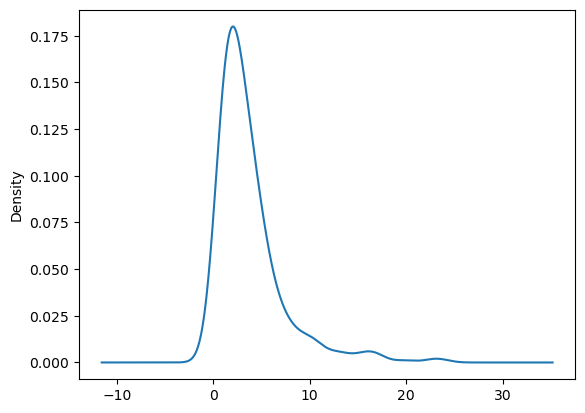

In [143]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).plot.density()

In [144]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nlargest()

isbn
9788027910014    23.500000
9788027909872    22.833333
9788027912841    19.857143
9788024951249    17.000000
9788027910182    16.909091
dtype: float64

In [145]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nsmallest()

isbn
9788088433262    0.113475
9788027720613    0.233871
9788088494065    0.253521
9788076617261    0.372617
9788090871250    0.393617
dtype: float64

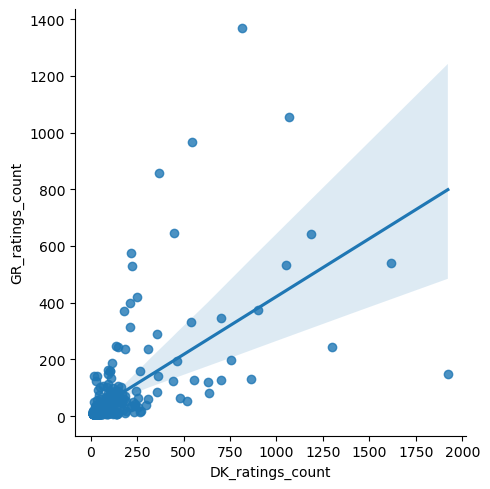

In [146]:
sns.lmplot(x='DK_ratings_count', y='GR_ratings_count', data=merged)

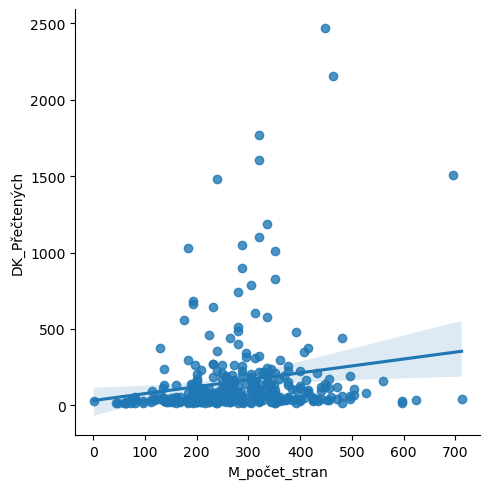

In [147]:
sns.lmplot(x='M_počet_stran', y='DK_Přečtených', data=merged)

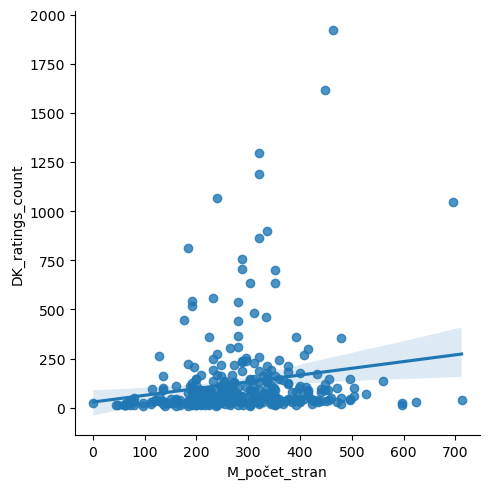

In [148]:
sns.lmplot(x='M_počet_stran', y='DK_ratings_count', data=merged)

In [149]:
zacatek = int(len(merged)*0.5)
konec = int(len(merged)*0.25)
len(merged.head(konec).tail(zacatek))

85

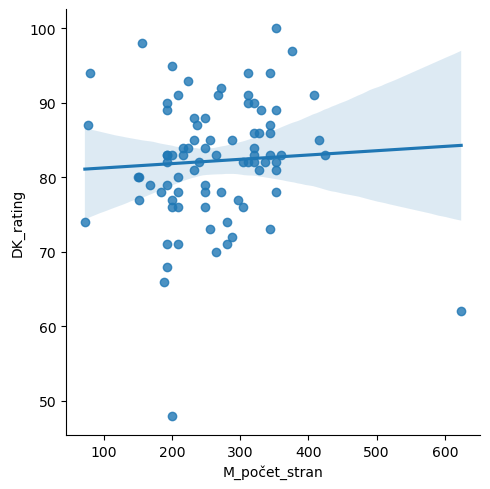

In [150]:
sns.lmplot(x='M_počet_stran', y='DK_rating', data=merged.head(konec).tail(zacatek).sort_values(by='M_počet_stran'))

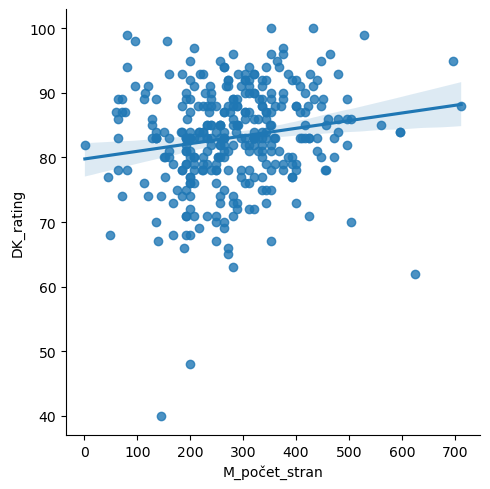

In [151]:
sns.lmplot(x='M_počet_stran', y='DK_rating', data=merged)

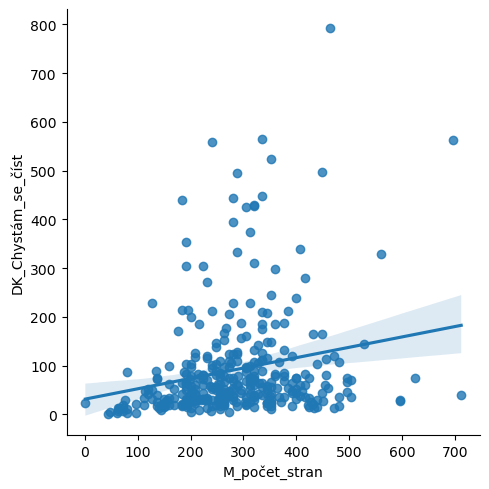

In [152]:
sns.lmplot(x='M_počet_stran', y='DK_Chystám_se_číst', data=merged)

## Co se líbí

In [154]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'skore', 'isbn',
       'hezky_titul', 'nakladatel'],
      dtype='object')

In [155]:
tagy = dk.copy()
tagy['DK_tags'] = tagy['DK_tags'].apply(lambda x: x.replace(f"""[""",'').replace(f"""]""",'').replace(f"""'""","").split(', '))
tagy = tagy.explode('DK_tags')
tagy['DK_tags'] = tagy['DK_tags'].apply(lambda x: x.lower())
tagy = tagy[['DK_date','DK_titul','DK_ratings_count','DK_rating','DK_tags']]
tagy = tagy[tagy['DK_date'] > week_ago]

In [156]:
tagy

,DK_date,DK_titul,DK_ratings_count,DK_rating,DK_tags
38267,2024-09-30 03:46:02,Intimní zóna,1.0,100.0,literatura česká
38268,2024-09-30 03:46:02,Na toulkách pod oblaky,1.0,60.0,literatura naučná
38268,2024-09-30 03:46:02,Na toulkách pod oblaky,1.0,60.0,doprava
38268,2024-09-30 03:46:02,Na toulkách pod oblaky,1.0,60.0,sport
38269,2024-09-30 03:46:03,Banka,16.0,79.0,detektivky
...,...,...,...,...,...
40401,2024-09-30 04:05:06,Christopher,10.0,96.0,literatura česká
40401,2024-09-30 04:05:06,Christopher,10.0,96.0,fantasy
40402,2024-09-30 04:05:07,Vesničanka,273.0,81.0,romány
40402,2024-09-30 04:05:07,Vesničanka,273.0,81.0,pro ženy


In [157]:
romany = tagy[tagy['DK_tags'].str.contains('román',na=False)]['DK_titul'].drop_duplicates().to_list()

In [158]:
tagy['DK_tags'].nunique()

93

In [159]:
dk.sample

<bound method NDFrame.sample of             DK_isbn             DK_date  \
0      9.788028e+12 2024-04-01 14:39:23   
1      9.788021e+12 2024-04-01 14:39:24   
2      9.788072e+12 2024-04-01 14:39:25   
3      9.788076e+12 2024-04-01 14:39:26   
4      9.788024e+12 2024-04-01 14:39:27   
...             ...                 ...   
40398  9.788028e+12 2024-09-30 04:05:04   
40399  9.788025e+12 2024-09-30 04:05:05   
40400  9.788076e+12 2024-09-30 04:05:06   
40401  9.788077e+12 2024-09-30 04:05:06   
40402  9.788025e+12 2024-09-30 04:05:07   

                                                DK_titul  DK_rating  \
0                                       Boží potměšilost       78.0   
1                                 Oprátka za osm mrtvých       88.0   
2                                                  Golem       82.0   
3                                 Proč všichni odcházejí       91.0   
4                                                 Sochař       81.0   
...                      

In [160]:
nejcastejsi_tagy = tagy.groupby('DK_tags').size()
nejcastejsi_tagy = nejcastejsi_tagy[nejcastejsi_tagy >= 10]
nejcastejsi_tagy = nejcastejsi_tagy.index.to_list()
len(nejcastejsi_tagy)

69

In [161]:
nejcastejsi_tagy

['architektura',
 'astrologie',
 'biografie a memoáry',
 'cestopisy a místopisy',
 'detektivky',
 'dobrodružné',
 'doprava',
 'duchovní literatura',
 'dívčí romány',
 'ekologie',
 'ekonomie a obchod',
 'erotika',
 'eseje',
 'esoterika',
 'fantasy',
 'fejetony',
 'filozofie',
 'historické romány',
 'historie',
 'hobby',
 'horory',
 'hudba a zpěv',
 'humor',
 'komiksy',
 'krimi',
 'literatura faktu',
 'literatura naučná',
 'literatura slovenská',
 'literatura světová',
 'literatura česká',
 'mezinárodní vztahy',
 'mytologie',
 'novely',
 'náboženství',
 'o literatuře',
 'obrazové publikace',
 'okultismus',
 'osobní rozvoj a styl',
 'poezie',
 'pohádky a bajky',
 'politologie',
 'povídky',
 'pověsti',
 'pragensia',
 'pro děti a mládež',
 'pro nejmenší',
 'pro ženy',
 'právo',
 'psychologie a pedagogika',
 'publicistika',
 'příběhy',
 'příroda',
 'přírodní vědy',
 'rodina',
 'romány',
 'sci-fi',
 'sociologie',
 'společnost',
 'sport',
 'thrillery',
 'umění',
 'vojenství',
 'válečné',
 'věd

In [162]:
zebricek = tagy[(tagy['DK_tags'].isin(nejcastejsi_tagy)) & (tagy['DK_titul'].isin(romany))].groupby('DK_tags')['DK_rating'].mean().sort_values(ascending=False)

In [163]:
zebricek.head(20)

DK_tags
válečné                93.500000
sci-fi                 87.518519
duchovní literatura    87.000000
historie               86.333333
literatura faktu       86.000000
hudba a zpěv           85.000000
náboženství            84.000000
dívčí romány           83.629630
pro děti a mládež      83.275862
mytologie              83.000000
novely                 82.333333
historické romány      81.389313
fantasy                81.258065
biografie a memoáry    81.111111
krimi                  79.898305
detektivky             79.898305
pro ženy               79.897959
literatura světová     79.833333
literatura česká       79.743271
romány                 79.069333
Name: DK_rating, dtype: float64

In [164]:
zebricek.tail(20)

DK_tags
fantasy                 81.258065
biografie a memoáry     81.111111
krimi                   79.898305
detektivky              79.898305
pro ženy                79.897959
literatura světová      79.833333
literatura česká        79.743271
romány                  79.069333
humor                   78.400000
thrillery               78.333333
hobby                   76.000000
erotika                 75.600000
horory                  75.000000
dobrodružné             74.700000
literatura slovenská    74.400000
filozofie               70.000000
okultismus              47.000000
esoterika               47.000000
astrologie              47.000000
pragensia               40.000000
Name: DK_rating, dtype: float64

In [165]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_rating', 'DK_ratings_count',
       'DK_tags', 'DK_Právě_čtených', 'DK_Přečtených', 'DK_Čtenářské_výzvě',
       'DK_Knihotéce', 'DK_Chystám_se_číst', 'DK_Chci_si_koupit',
       'DK_dalších_seznamech', 'DK_Doporučených', 'skore', 'isbn',
       'hezky_titul', 'nakladatel'],
      dtype='object')

In [166]:
dk['DK_date'] = pd.to_datetime(dk['DK_date'])

In [167]:
dk[dk['DK_titul'] == 'Rozložíš paměť']

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,skore,isbn,hezky_titul,nakladatel
271,9.788076e+12,2024-04-01 14:46:30,Rozložíš paměť,84.0,113.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,138.0,25.0,47.0,237.0,67.0,4.0,10.0,375.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
1384,9.788076e+12,2024-04-02 10:29:20,Rozložíš paměť,84.0,113.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,138.0,25.0,47.0,238.0,67.0,4.0,10.0,376.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
2501,9.788076e+12,2024-04-03 16:59:08,Rozložíš paměť,84.0,113.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,138.0,25.0,47.0,238.0,67.0,4.0,10.0,376.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
3620,9.788076e+12,2024-04-05 10:10:41,Rozložíš paměť,84.0,114.0,"['homosexualita', 'česká literatura', 'dospívá...",10.0,139.0,25.0,47.0,240.0,67.0,4.0,10.0,379.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
4736,9.788076e+12,2024-04-07 13:44:59,Rozložíš paměť,84.0,115.0,"['homosexualita', 'česká literatura', 'dospívá...",12.0,140.0,26.0,47.0,242.0,67.0,4.0,10.0,382.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
5860,9.788076e+12,2024-04-19 23:46:17,Rozložíš paměť,85.0,128.0,"['homosexualita', 'česká literatura', 'dospívá...",15.0,154.0,29.0,54.0,285.0,72.0,5.0,12.0,439.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
7019,9.788076e+12,2024-04-22 03:28:44,Rozložíš paměť,85.0,130.0,"['homosexualita', 'česká literatura', 'dospívá...",13.0,158.0,29.0,55.0,293.0,74.0,5.0,12.0,451.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
8179,9.788076e+12,2024-04-29 03:10:14,Rozložíš paměť,85.0,135.0,"['Romány', 'Literatura česká', 'homosexualita'...",28.0,166.0,30.0,62.0,311.0,80.0,5.0,14.0,477.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
9624,9.788076e+12,2024-05-06 09:57:18,Rozložíš paměť,85.0,146.0,"['Romány', 'Literatura česká', 'homosexualita'...",49.0,184.0,33.0,64.0,310.0,80.0,5.0,14.0,494.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
10837,9.788076e+12,2024-05-13 03:17:54,Rozložíš paměť,86.0,189.0,"['Romány', 'Literatura česká', 'homosexualita'...",34.0,240.0,40.0,76.0,313.0,79.0,5.0,17.0,553.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka


In [168]:
dk.groupby(["DK_titul",pd.Grouper(freq="W",key="DK_date")])['DK_rating'].mean()

DK_titul                     DK_date   
#NAJDImě                     2024-10-06    82.0
(NE)uvěřitelný život Oty K.  2024-04-07    60.0
                             2024-04-21    60.0
                             2024-04-28    60.0
                             2024-05-05    60.0
                                           ... 
…a přeskočila jiskra         2024-09-08    58.0
                             2024-09-15    58.0
                             2024-09-22    58.0
                             2024-09-29    58.0
                             2024-10-06    58.0
Name: DK_rating, Length: 35908, dtype: float64

## Novinky

In [170]:
gr.groupby("GR_title")['GR_date'].min().sort_values(ascending=False).head(50)

GR_title
Rjesurrjekturys: M.A. Bjeljanskyj. Resurrecturis by Jan Hamerský                      2024-09-30 03:44:57
Židle pro Anhelinu by Ivona Březinová                                                 2024-09-30 03:39:55
Vypůjčený čas by Zuzana Strachotová                                                   2024-09-30 03:37:30
Ve větvích Yggdrasilu by Tereza Kadečková                                             2024-09-30 03:34:33
Ty chladné oči by Scarlett Wilková                                                    2024-09-30 03:34:14
Osmdesátky by Josef Káďa Kadeřábek                                                    2024-09-30 03:33:49
Rybář Jarmil Koloušek by Dominik Landsman                                             2024-09-30 03:33:38
Černá lilie by Vlastimil Vondruška                                                    2024-09-30 03:30:54
Spálená země: kniha první by Jakub Hoza                                               2024-09-30 03:29:42
Pokrok nezastavíš, čéče! by Milada Re

In [171]:
dk.groupby("DK_titul")['DK_date'].min().sort_values(ascending=False).head(50)

DK_titul
Nechoď tam!                             2024-09-30 04:04:49
Povídkový antikvariát U Dvou hlav       2024-09-30 04:04:42
Když se rozestoupí mraky                2024-09-30 04:04:41
Místečka                                2024-09-30 04:04:36
Bezelstní hráči                         2024-09-30 04:04:31
Černá raptořice                         2024-09-30 04:04:26
Kovové nebe                             2024-09-30 04:04:21
Včelka Meduška                          2024-09-30 04:04:21
Vypůjčený čas                           2024-09-30 04:04:10
Ve větvích Yggdrasilu                   2024-09-30 04:04:02
Ty chladné oči                          2024-09-30 04:03:59
Byl jsem mladistvým vykradačem hrobů    2024-09-30 04:03:54
Rybář Jarmil Koloušek                   2024-09-30 04:03:51
Černá lilie                             2024-09-30 04:03:44
Sofinka a paměť stromů                  2024-09-30 04:03:40
Zejtra už                               2024-09-30 04:03:39
Vesmírná zásilkovna            

In [172]:
dk['nakladatel'] = dk['isbn'].apply(lambda x: nakladatelstvi(x))
pribytek = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index().sum().iloc[1]
nakladatelstvo = pd.DataFrame(dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].max() - dk[dk['DK_date'] > month_ago].groupby(['hezky_titul','nakladatel'])['skore'].min()).groupby('nakladatel').sum().reset_index()
nakladatelstvo['podil'] = nakladatelstvo['skore'] / pribytek
nakladatelstvo = nakladatelstvo[nakladatelstvo['podil'] >= 0.005]
nakladatelstvo['podil'] = nakladatelstvo['podil'].apply(lambda x: f"""{round(x * 100, 1)}&nbsp;%""".replace(".", ","))
nakladatelstvo = nakladatelstvo.sort_values(by='skore',ascending=False)
nakladatelstvo = nakladatelstvo.drop(columns=['skore'])

In [173]:
nakladatelstvo

,nakladatel,podil
195,Motto,"11,3&nbsp;%"
192,Moba,"9,7&nbsp;%"
124,Host,"8,8&nbsp;%"
140,Kalibr,"6,0&nbsp;%"
127,Ikar CZ,"4,4&nbsp;%"
41,Bourdon,"3,9&nbsp;%"
46,Bílá vrána,"3,8&nbsp;%"
20,Argo,"3,5&nbsp;%"
88,Epocha,"3,0&nbsp;%"
240,Paseka,"2,4&nbsp;%"


In [174]:
dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == 'Paseka')]

,DK_isbn,DK_date,DK_titul,DK_rating,DK_ratings_count,DK_tags,DK_Právě_čtených,DK_Přečtených,DK_Čtenářské_výzvě,DK_Knihotéce,DK_Chystám_se_číst,DK_Chci_si_koupit,DK_dalších_seznamech,DK_Doporučených,skore,isbn,hezky_titul,nakladatel
32327,9.788076e+12,2024-09-02 03:59:54,"Zmizelá Praha: Vesnice, usedlosti a dvory: Pra...",93.0,3.0,"['Literatura česká', 'Historie', 'Pragensia']",NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,9788076374027,"['Jana Viktorínová', 'Lubomír Procházka', 'Mar...",Paseka
32342,9.788076e+12,2024-09-02 04:00:08,Husité na Žižkově: Pomíjivá paměť pražské peri...,85.0,11.0,"['Literatura naučná', 'Historie', 'Pragensia']",1.0,12.0,2.0,6.0,16.0,6.0,2.0,NaN,28.0,9788076374126,Petr Čornej: Husité na Žižkově: Pomíjivá paměť...,Paseka
32398,9.788076e+12,2024-09-02 04:01:00,Třicetiletá válka: Stručná historie,83.0,16.0,"['Literatura naučná', 'Historie']",1.0,20.0,1.0,13.0,25.0,12.0,1.0,1.0,45.0,9788076374034,Jan Kilian: Třicetiletá válka: Stručná historie,Paseka
32418,9.788076e+12,2024-09-02 04:01:25,Velké dějiny zemí Koruny české,80.0,1.0,"['Literatura naučná', 'Historie', 'Zdravotnict...",NaN,2.0,NaN,12.0,16.0,9.0,NaN,NaN,18.0,9788076373310,Karel Černý: Velké dějiny zemí Koruny české,Paseka
32567,9.788076e+12,2024-09-02 04:03:30,Fosilie,73.0,216.0,"['Romány', 'Literatura česká']",12.0,284.0,44.0,57.0,212.0,43.0,7.0,11.0,496.0,9788076374003,Michal Kašpárek: Fosilie,Paseka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40043,9.788076e+12,2024-09-30 04:01:42,Rozložíš paměť,85.0,367.0,"['Romány', 'Literatura česká']",32.0,485.0,73.0,111.0,393.0,93.0,10.0,29.0,878.0,9788076373990,Marek Torčík: Rozložíš paměť,Paseka
40097,9.788076e+12,2024-09-30 04:02:14,Fosilie,73.0,224.0,"['Romány', 'Literatura česká']",11.0,295.0,45.0,59.0,214.0,45.0,7.0,11.0,509.0,9788076374003,Michal Kašpárek: Fosilie,Paseka
40191,9.788076e+12,2024-09-30 04:03:08,Letnice,86.0,81.0,"['Romány', 'Literatura česká']",5.0,105.0,10.0,57.0,212.0,39.0,5.0,10.0,317.0,9788076374638,Miroslav Hlaučo: Letnice,Paseka
40213,9.788076e+12,2024-09-30 04:03:19,Co se stalo Veronice,65.0,80.0,"['Novely', 'Pro ženy', 'Literatura česká']",NaN,107.0,12.0,24.0,44.0,12.0,NaN,2.0,151.0,9788076373396,Tereza Nováková: Co se stalo Veronice,Paseka


In [175]:
str(datetime.datetime.now())

'2024-09-30 09:57:33.310690'

In [176]:
def koho_vydavaji(nakl):
    global dk
    top = pd.DataFrame(dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == nakl)].groupby('hezky_titul')['skore'].max() - dk[(dk['DK_date'] > month_ago) & (dk['nakladatel'] == nakl)].groupby('hezky_titul')['skore'].min()).groupby('hezky_titul').sum().reset_index()
    print(top)
    top = top.groupby('hezky_titul')['skore'].max().nlargest(3).index.to_list()
    print(top)
    top2 = [x.split(":")[0] for x in top if "[" not in x]
    top2 = list(set(top2))
    kolik = len(top2)
    if kolik > 3:
        return top2[:3]
    else:
        return top2

In [177]:
print(koho_vydavaji('Paseka'))

                                          hezky_titul  skore
0   Jakub Sedláček: Neviditelné řemeslo: Tajemství...    5.0
1                               Jakub Šponer: Ekstase    2.0
2     Jan Kilian: Třicetiletá válka: Stručná historie    0.0
3                          Josef Váchal: Krvavý román    0.0
4         Karel Černý: Velké dějiny zemí Koruny české    1.0
5   Karel Černý: Velké dějiny zemí Koruny české. T...    0.0
6   Kristýna Plíhalová: Bažina v obýváku a jiná do...    2.0
7                Magdalena Bujabéza Rejžková: Přístav    0.0
8                        Marek Torčík: Rozložíš paměť   45.0
9                            Michal Kašpárek: Fosilie   13.0
10                           Miroslav Hlaučo: Letnice   36.0
11                    Ondřej Trhoň: Ještě jeden level    2.0
12  Petr Čornej: Husité na Žižkově: Pomíjivá paměť...    1.0
13         Petr Šabach: Láska je kurva a jiné povídky    1.0
14              Tereza Nováková: Co se stalo Veronice    2.0
15                  Zuza